In [2]:
!pip install pandas

In [3]:
"""
import time

from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

options = Options()
driver = webdriver.Chrome("C:\Program Files\chromedriver_linux64")
download_url = 'https://www.boatrace.jp/owpc/pc/extra/data/download.html'
driver.get(download_url)
time.sleep(7)
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
datas = soup.find('ul', attrs={'class':'data_list h-mt15'})
datas_url = datas.find_all('a')
for data_url in datas_url:
    home_url = 'https://www.boatrace.jp'
    data_url = home_url + data_url.get('href')
    driver.get(data_url)
    time.sleep(5)
driver.close()
"""

In [7]:
"""
import time
from selenium import webdriver #Selenium Webdriverをインポートする
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

# Serviceオブジェクトを作成
service = Service(ChromeDriverManager().install())

# Serviceオブジェクトを使用してWebDriverを作成
options = Options()
driver = webdriver.Chrome(service=service, options=options)

hall_pref="大阪府"
hall_name="123N+松原"

hp_url=f"https://ana-slo.com/ホールデータ/{hall_pref}/"

time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド

search_box = driver.find_element_by_name("q") #DOM操作
 
search_box.send_keys('NakamuraBlog') #Google検索ボックス内に「NakamuraBlog」と入力
search_box.submit() #Google検索ボタンのクリック 
 
time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド
 
research_result = driver.find_element_by_partial_link_text("nkmrdai") #検索結果hrefタグ内に「nkmradai」があるリンクを探す
research_result.click() #クリックする。 #このタイミングでNakamuraBlogのトップページが開かれたらOK
 
time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド
 
driver.quit() #Chromeブラウザを閉じる
"""

## アナスロデータ収集

### 単体

In [42]:
from datetime import datetime
from urllib.request import urlopen
import random
import csv
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd

# チェリー狙いでのブドウ確率を計算


def calc_grape(game_num, big_num, reg_num, diffrent_piece, model_num):
    # ゲーム数 ビッグ回数 レギュラー回数 差枚数  機種ナンバー
    try:
        if model_num == 1:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)*2)
        elif model_num == 2:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)*2)
        elif model_num == 3:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)*2)
        elif model_num == 4:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
        elif model_num == 5:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
    except:
        return 0


shop_pref = "兵庫県"
shop_name = "オール湊川"
# 正規表現パターンを定義
pattern = r'\([^)]*\)'

try:
    # 日付を取得するための対象URL
    url = f'https://ana-slo.com/ホールデータ/{shop_pref}/{shop_name}-データ一覧'
    # ウェブページをダウンロード
    response = requests.get(url)

    # ページのコンテンツをBeautiful Soupで解析
    soup = BeautifulSoup(response.text, 'html.parser')
    wait_time = random.uniform(3, 5)
    time.sleep(wait_time)

    div_element = soup.find('div', class_="date-list-area")
    a_elements = div_element.findAll("a")
    days_list = []
    # ここで何日分集めるか指定
    for a_element in a_elements[0:365]:
        days_list.append(a_element.text)
    print(days_list)

    # 入力形式を指定
    input_format = "%Y/%m/%d"
    # 出力形式を指定
    output_format = "%Y-%m-%d"

    column_names = ["日付", "機種名", "台番号", "G数", "差枚", "BB回数",
                    "RB回数", "合成確率", "BB確率", "RB確率", "ブドウ確率"]  # 列名を指定するリストを作成
    df = pd.DataFrame(columns=column_names)
    for day_with_day_of_week in days_list:
        # 正規表現パターンに一致する部分を削除
        print(day_with_day_of_week)
        day = re.sub(pattern, '', day_with_day_of_week)
        # 日付文字列をdatetimeオブジェクトに変換
        date_object = datetime.strptime(day, input_format)
        # 新しい形式で日付を文字列に変換
        output_date_str = date_object.strftime(output_format)

        # スクレイピング対象のURL
        url = f'https://ana-slo.com/{output_date_str}-{shop_name}-data/'
        # ウェブページをダウンロード
        response = requests.get(url)

        # ページのコンテンツをBeautiful Soupで解析
        soup = BeautifulSoup(response.text, 'html.parser')

        wait_time = random.uniform(3, 5)
        time.sleep(wait_time)

        # アイムジャグラーのh4タグのテキストを検索
        h4_text_im = "アイムジャグラーEX-TP"
        h4_element = soup.find('h4', string=h4_text_im)
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            print(shop_name)
            im_rows = table.findAll("tr")
            # 最後の要素を削除
            del im_rows[-1]
        # マイジャグラーのh4タグのテキストを検索
        h4_text_my = "マイジャグラーV"
        h4_element = soup.find('h4', string=h4_text_my)
        my_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            my_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del my_rows[0]
            del my_rows[-1]

        # ファンキージャグラーのh4タグのテキストを検索
        h4_text_fanky = "ファンキージャグラー2"
        h4_element = soup.find('h4', string=h4_text_fanky)
        fanky_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            fanky_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del fanky_rows[0]
            del fanky_rows[-1]

        # ハッピージャグラーのh4タグのテキストを検索
        h4_text_happy = "ハッピージャグラーVIII"
        h4_element = soup.find('h4', string=h4_text_happy)
        happy_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            happy_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del happy_rows[0]
            del happy_rows[-1]

        # ゴーゴージャグラーのh4タグのテキストを検索
        h4_text_gogo = "ゴーゴージャグラー3"
        h4_element = soup.find('h4', string=h4_text_gogo)
        gogo_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            gogo_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del gogo_rows[0]
            del gogo_rows[-1]

        for row in im_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if csvRow[0] == "台番号":
                pass
            else:
                if len(csvRow) == 10:
                    # 6個目のARTと10個目のART確率を削除
                    del csvRow[5]
                    del csvRow[8]
                elif len(csvRow) < 7:
                    break
                csvRow.insert(0, date_object)
                csvRow.insert(1, f"アイムジャグラーEX-TP")
                for i in range(5):
                    csvRow[i+2] = csvRow[i+2].replace(',', '')
                    csvRow[i+2] = csvRow[i+2].replace('+', '')
                    csvRow[i+2] = int(csvRow[i+2])
                csvRow.append(calc_grape(
                    csvRow[3], csvRow[5], csvRow[6], csvRow[4], 1))
                df.loc[len(df)] = csvRow

        for row in my_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break

            csvRow.insert(0, date_object)
            csvRow.insert(1, f"マイジャグラーV")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 2))
            df.loc[len(df)] = csvRow

        for row in fanky_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ファンキージャグラー2")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 3))
            df.loc[len(df)] = csvRow

        for row in happy_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ハッピージャグラーVIII")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow

        for row in gogo_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ゴーゴージャグラー3")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow

    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print("終了")
except Exception as e:
    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print(e)
    print(f"{shop_name}、異常終了")
    pass


['2023/09/24(日)', '2023/09/23(土)', '2023/09/22(金)', '2023/09/21(木)', '2023/09/20(水)', '2023/09/19(火)', '2023/09/18(月)', '2023/09/17(日)', '2023/09/16(土)', '2023/09/15(金)', '2023/09/14(木)', '2023/09/13(水)', '2023/09/12(火)', '2023/09/11(月)', '2023/09/10(日)', '2023/09/09(土)', '2023/09/08(金)', '2023/09/07(木)', '2023/09/06(水)', '2023/09/05(火)', '2023/09/03(日)', '2023/09/02(土)', '2023/09/01(金)', '2023/08/31(木)', '2023/08/30(水)', '2023/08/29(火)', '2023/08/28(月)', '2023/08/27(日)', '2023/08/26(土)', '2023/08/25(金)', '2023/08/24(木)', '2023/08/23(水)', '2023/08/22(火)', '2023/08/21(月)', '2023/08/20(日)', '2023/08/19(土)', '2023/08/18(金)', '2023/08/17(木)', '2023/08/16(水)', '2023/08/14(月)', '2023/08/13(日)', '2023/08/12(土)', '2023/08/11(金)', '2023/08/10(木)', '2023/08/09(水)', '2023/08/08(火)', '2023/08/06(日)', '2023/08/05(土)', '2023/08/04(金)', '2023/08/03(木)', '2023/08/02(水)', '2023/08/01(火)', '2023/07/31(月)', '2023/07/30(日)', '2023/07/29(土)', '2023/07/28(金)', '2023/07/27(木)', '2023/07/26(水)', '2023/07/25(火

KeyboardInterrupt: 

In [42]:
from datetime import datetime
from urllib.request import urlopen
import random
import csv
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import re
import os

# チェリー狙いでのブドウ確率を計算


def calc_grape(game_num, big_num, reg_num, diffrent_piece, model_num):
    # ゲーム数 ビッグ回数 レギュラー回数 差枚数  機種ナンバー
    try:
        if model_num == 1:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)*2)
        elif model_num == 2:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)*2)
        elif model_num == 3:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)*2)
        elif model_num == 4:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
        elif model_num == 5:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
    except:
        return 0


# 正規表現パターンを定義
pattern = r'\([^)]*\)'
shop_pref = "兵庫県"
get_shop_url = f"https://ana-slo.com/ホールデータ/{shop_pref}/"
# ウェブページをダウンロード
response = requests.get(get_shop_url)
# ページのコンテンツをBeautiful Soupで解析
soup = BeautifulSoup(response.text, 'html.parser')
wait_time = random.uniform(3, 5)
time.sleep(wait_time)

table_element = soup.find('div', class_="table-body")
div_elements = table_element.findAll("div", class_="table-row")
shop_list = []

for div_element in div_elements:
    # 1つ目の<div>内の<a>タグのテキストを取得
    shop_name = div_element.find('div', class_='table-data-cell').a.text
    # 2つ目の<div>内のテキストを取得
    shop_city = div_element.find_all('div', class_='table-data-cell')[1].text
    print(shop_name, shop_city)
    shop_list.append(shop_name)
#     if "神戸市" in shop_city:
#         shop_list.append(shop_name)

# 現在のディレクトリ内のファイルをリストアップ
file_list = os.listdir()

# CSVファイルのみを選択
csv_files = [filename for filename in file_list if filename.endswith('.csv')]
exist_shop = []
# 結果を表示
for csv_file in csv_files:
    exist_shop = csv_file.replace(".csv", "")
    if exist_shop in shop_list:
        shop_list.remove(exist_shop)
    else:
        continue

for shop_name in shop_list:
    try:
    # 日付を取得するための対象URL
    url = f'https://ana-slo.com/ホールデータ/{shop_pref}/{shop_name}-データ一覧'
    # ウェブページをダウンロード
    response = requests.get(url)

    # ページのコンテンツをBeautiful Soupで解析
    soup = BeautifulSoup(response.text, 'html.parser')
    wait_time = random.uniform(3, 5)
    time.sleep(wait_time)

    div_element = soup.find('div', class_="date-list-area")
    a_elements = div_element.findAll("a")
    days_list = []
    # ここで何日分集めるか指定
    for a_element in a_elements[0:190]:
        days_list.append(a_element.text)

    # 入力形式を指定
    input_format = "%Y/%m/%d"
    # 出力形式を指定
    output_format = "%Y-%m-%d"

    column_names = ["日付", "機種名", "台番号", "G数", "差枚", "BB回数",
                    "RB回数", "合成確率", "BB確率", "RB確率", "ブドウ確率"]  # 列名を指定するリストを作成
    df = pd.DataFrame(columns=column_names)
    for day_with_day_of_week in days_list:
        # 正規表現パターンに一致する部分を削除
        day = re.sub(pattern, '', day_with_day_of_week)
        # 日付文字列をdatetimeオブジェクトに変換
        date_object = datetime.strptime(day, input_format)
        # 新しい形式で日付を文字列に変換
        output_date_str = date_object.strftime(output_format)

        # スクレイピング対象のURL
        url = f'https://ana-slo.com/{output_date_str}-{shop_name}-data/'
        # ウェブページをダウンロード
        response = requests.get(url)

        # ページのコンテンツをBeautiful Soupで解析
        soup = BeautifulSoup(response.text, 'html.parser')

        wait_time = random.uniform(3, 5)
        time.sleep(wait_time)

        # アイムジャグラーのh4タグのテキストを検索
        h4_text_im = "アイムジャグラーEX-TP"
        h4_element = soup.find('h4', string=h4_text_im)
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            print(shop_name)
            im_rows = table.findAll("tr")
            # 最後の要素を削除
            del im_rows[-1]
        # マイジャグラーのh4タグのテキストを検索
        h4_text_my = "マイジャグラーV"
        h4_element = soup.find('h4', string=h4_text_my)
        my_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            my_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del my_rows[0]
            del my_rows[-1]

        # ファンキージャグラーのh4タグのテキストを検索
        h4_text_fanky = "ファンキージャグラー2"
        h4_element = soup.find('h4', string=h4_text_fanky)
        fanky_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            fanky_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del fanky_rows[0]
            del fanky_rows[-1]

        # ハッピージャグラーのh4タグのテキストを検索
        h4_text_happy = "ハッピージャグラーVIII"
        h4_element = soup.find('h4', string=h4_text_happy)
        happy_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            happy_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del happy_rows[0]
            del happy_rows[-1]

        # ゴーゴージャグラーのh4タグのテキストを検索
        h4_text_gogo = "ゴーゴージャグラー3"
        h4_element = soup.find('h4', string=h4_text_gogo)
        gogo_rows = []
        if h4_element is not None:
            # h4タグの次の要素を検索
            next_element = h4_element.find_next_sibling()
            if next_element.name != 'div':
                # ulタグの次の要素（divタグ）を検索
                div_element = next_element.find_next_sibling()
            else:
                div_element=next_element 
            # テーブルを指定
            table = div_element.find("table")
            gogo_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del gogo_rows[0]
            del gogo_rows[-1]

        for row in im_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if csvRow[0] == "台番号":
                pass
            else:
                #ARTとART確率が含まれる場合
                if len(csvRow) == 10:
                    # 6個目のARTと10個目のART確率を削除
                    del csvRow[5]
                    del csvRow[8]
                elif len(csvRow) < 7:
                    break
                csvRow.insert(0, date_object)
                csvRow.insert(1, f"アイムジャグラーEX-TP")
                for i in range(5):
                    csvRow[i+2] = csvRow[i+2].replace(',', '')
                    csvRow[i+2] = csvRow[i+2].replace('+', '')
                    csvRow[i+2] = int(csvRow[i+2])
                csvRow.append(calc_grape(
                    csvRow[3], csvRow[5], csvRow[6], csvRow[4], 1))
                df.loc[len(df)] = csvRow

        for row in my_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break

            csvRow.insert(0, date_object)
            csvRow.insert(1, f"マイジャグラーV")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 2))
            df.loc[len(df)] = csvRow

        for row in fanky_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ファンキージャグラー2")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 3))
            df.loc[len(df)] = csvRow

        for row in happy_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ハッピージャグラーVIII")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow
        # ゴーゴージャグラーのh4タグのテキストを検索
        h4_text_gogo = "ゴーゴージャグラー3"
        h4_element = soup.find('h4', string=h4_text_gogo)
        gogo_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            gogog_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del gogo_rows[0]
            del gogo_rows[-1]

        for row in gogo_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ゴーゴージャグラー3")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 5))
            df.loc[len(df)] = csvRow

    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print("終了")
except Exception as e:
    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print(e)
    print(f"{shop_name}、異常終了")
    continue


## 特徴量作成、可視化

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
回転数不足 の割合 : 0.5776857429718876
設定1 の割合 : 0.20481927710843373
設定2 の割合 : 0.06563755020080321
設定3 の割合 : 0.05572289156626506
設定4 の割合 : 0.04656124497991968
設定5 の割合 : 0.035266064257028114
設定6 の割合 : 0.01430722891566265


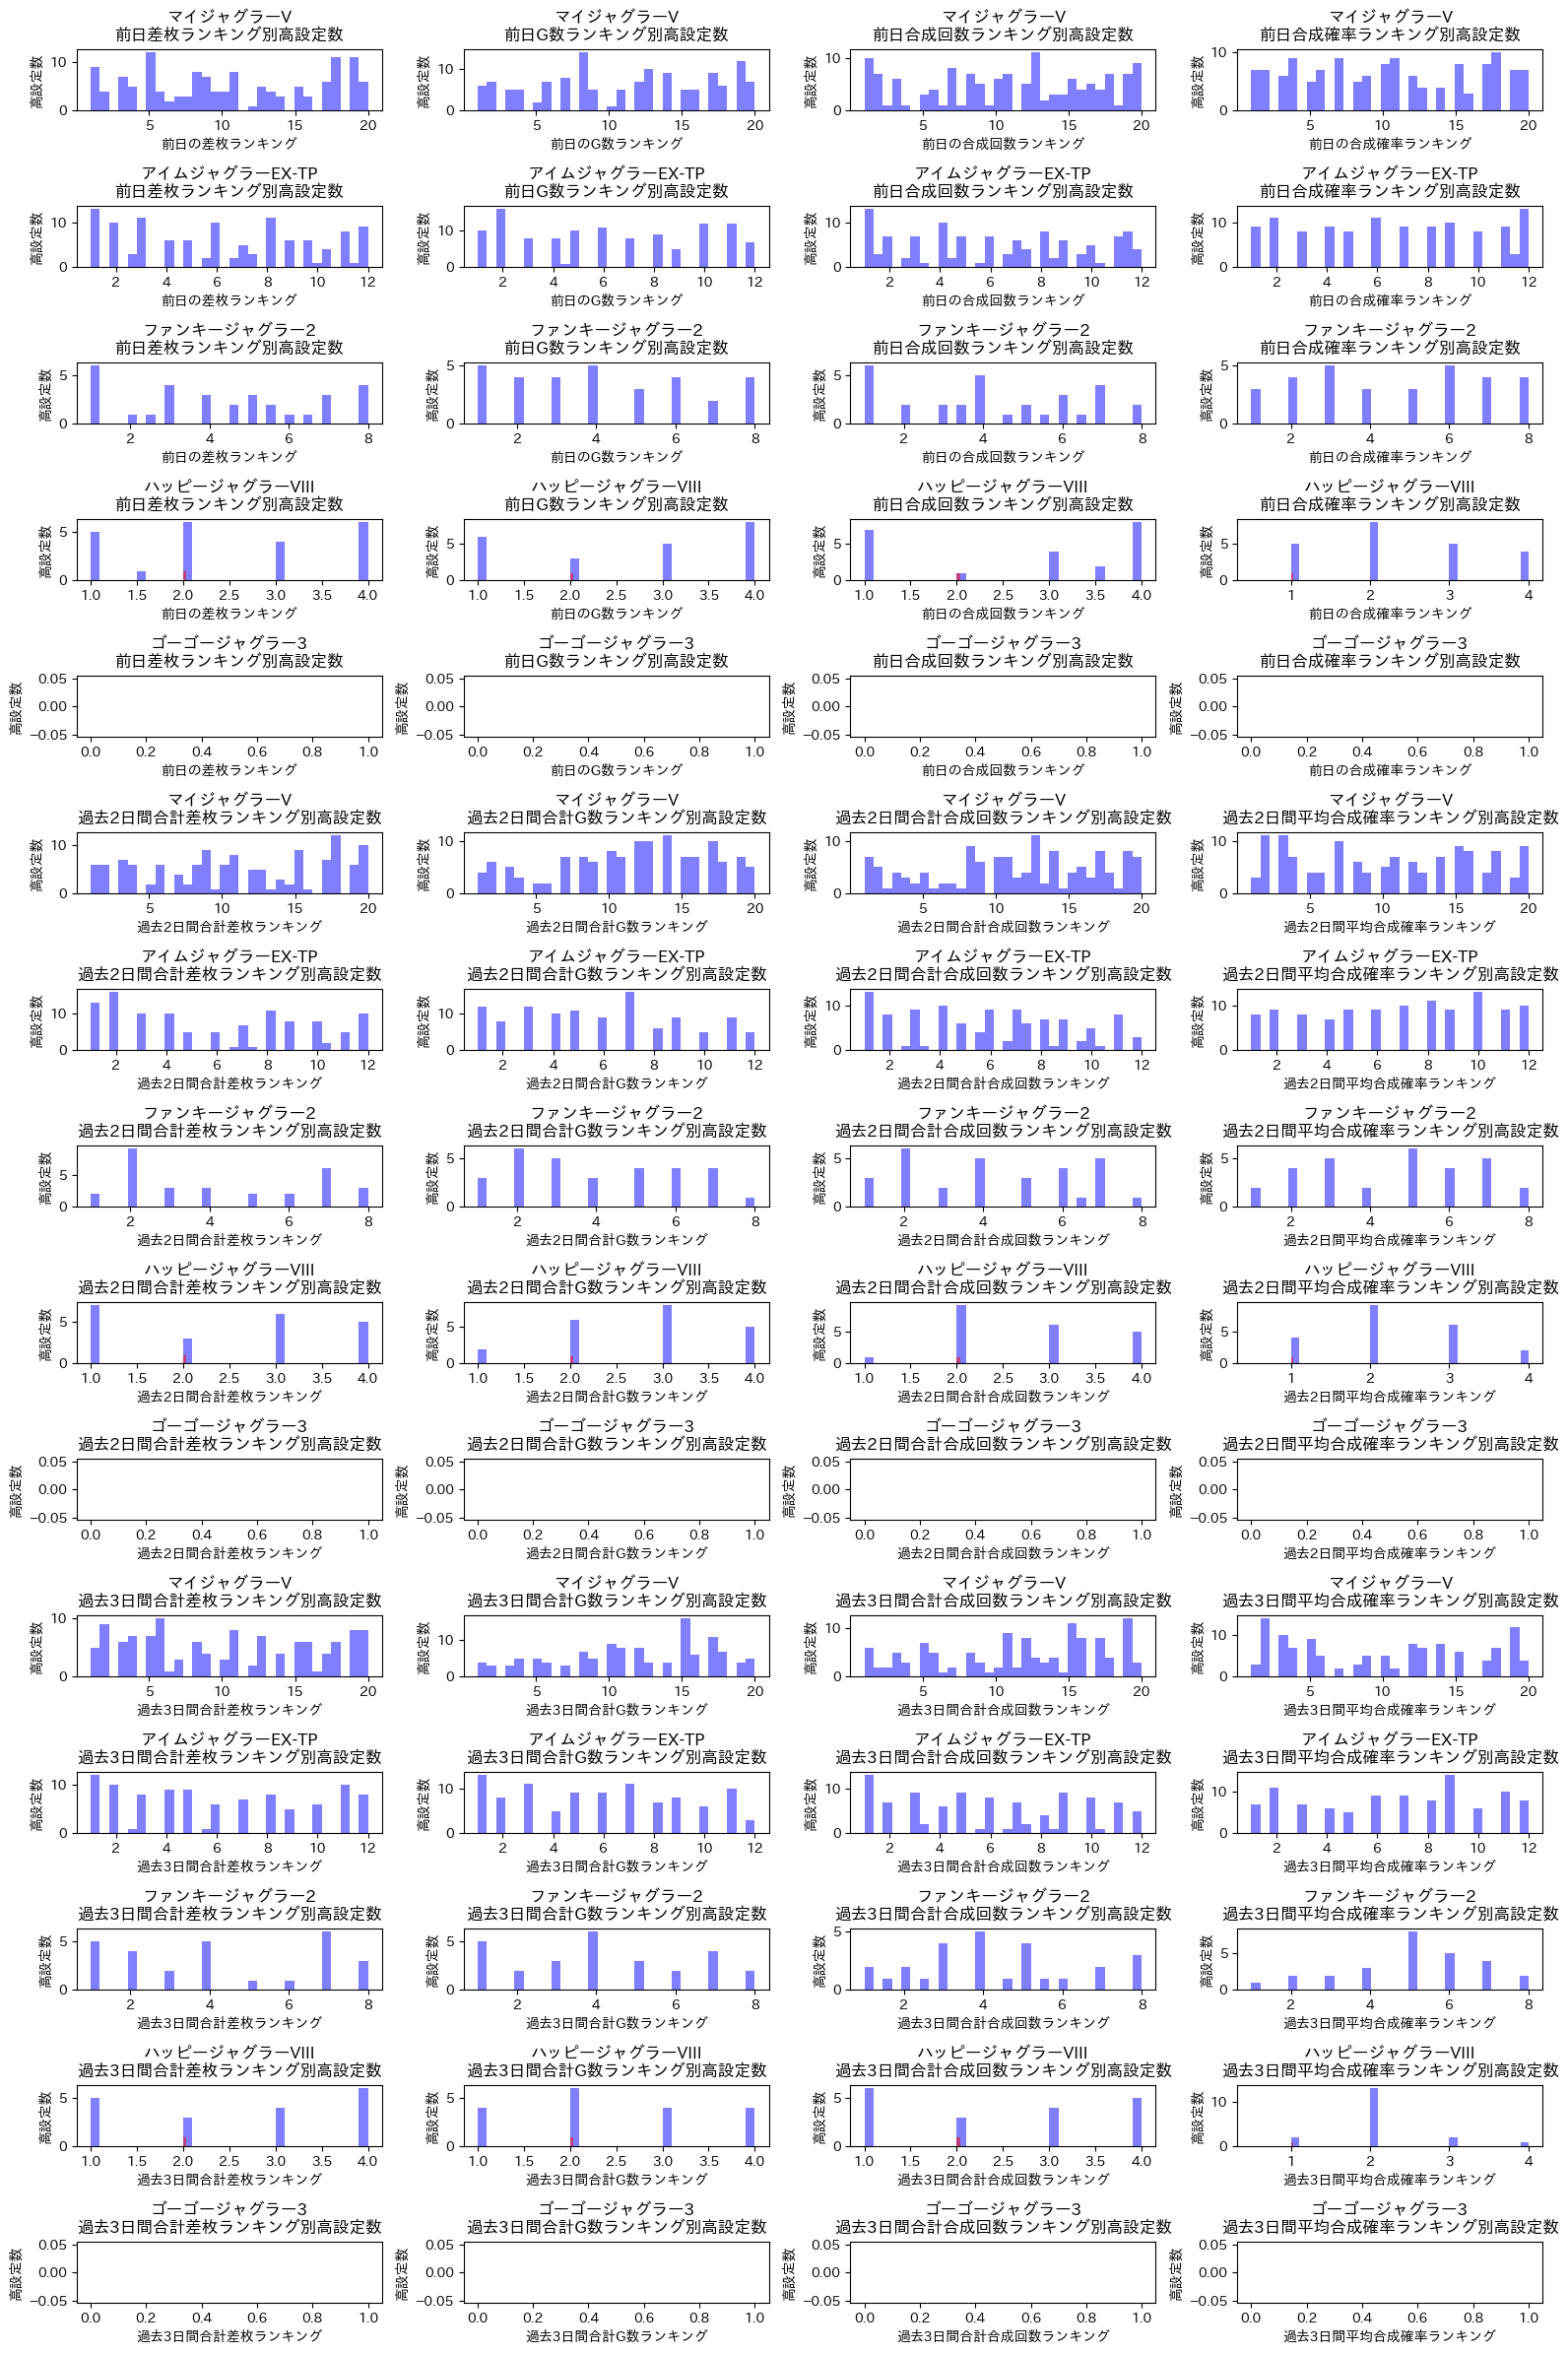

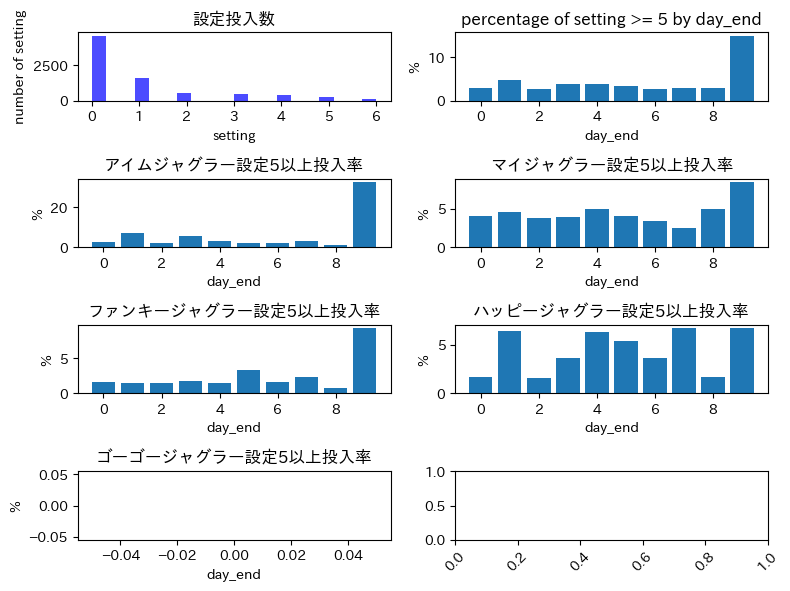

In [249]:
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
pd.set_option('display.max_rows', 10000)
shop_name="キコーナ御影店"
main_data=pd.read_csv(f"CSV一覧/{shop_name}.csv", encoding="shift-jis")

#分数を変換
main_data['合成確率'] = main_data['合成確率'] .str.replace('1/','')
main_data['合成確率']=main_data['合成確率'].astype('float64')
main_data['BB確率'] = main_data['BB確率'] .str.replace('1/','')
main_data['BB確率']=main_data['BB確率'].astype('float64')
main_data['RB確率'] = main_data['RB確率'] .str.replace('1/','')
main_data['RB確率']=main_data['RB確率'].astype('float64')

#一旦すべて設定１とする
main_data['setting'] = 1
#アイムジャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 399.6) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 331.0) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 315.1) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 255.0) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 255.0) & (main_data['機種名']=="アイムジャグラーEX-TP") & (main_data["ブドウ確率"]<5.90),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#マイジャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 385.5) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 336.1) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 290.0) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 268.6) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.85)|(main_data["BB確率"]<=270.8)),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 229.1) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.80)|(main_data["BB確率"]<=266.4)),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#ファンキージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 407.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 366.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 322.8) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 299.3) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.88),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 262.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.83),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#ハッピージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 362.08) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=273.1)),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 332.67) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=273.1)),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 300.62) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=273.1)),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 273.07) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.01)|(main_data["BB確率"]<=270.8)),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 256.00) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=5.98)|(main_data["BB確率"]<=263.2)),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#ゴーゴージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 362.08) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=259.0)),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 332.67) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=259.1)),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 300.62) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=259.1)),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 273.07) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.01)|(main_data["BB確率"]<=258.0)),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 256.00) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=5.98)|(main_data["BB確率"]<=257.0)),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が4000未満は設定0として扱う

#時刻データに変換
main_data['日付'] = pd.to_datetime(main_data['日付'])
main_data['day_end'] = main_data['日付'].astype(str).str[-1].astype(int) #日付末尾

main_data['合成回数']=main_data['BB回数']+main_data['RB回数']

# 同じ機種名と同じ日付の台数を数えて新しい列に代入
main_data['機種台数'] = main_data.groupby(['機種名', '日付'])['台番号'].transform('count')
machine_nums_list = main_data.groupby('機種名')['機種台数'].unique().reset_index(name='機種台数リスト')
# 前日の差枚、G数、BB確率、RB確率を計算して新しい列に追加
# main_data['前日の差枚'] = main_data.groupby("台番号")['差枚'].shift(-1)
# main_data['前日のG数'] = main_data.groupby("台番号")['G数'].shift(-1)
# main_data['前日のBB確率'] = main_data.groupby("台番号")['BB確率'].shift(-1)
# main_data['前日のRB確率'] = main_data.groupby("台番号")['RB確率'].shift(-1)
main_data['1日後'] = main_data['日付'] + pd.Timedelta(days=1)
main_data['2日後'] = main_data['日付'] + pd.Timedelta(days=2)
main_data['3日後'] = main_data['日付'] + pd.Timedelta(days=3)
#前日のランキングを当日の列に反映
ranking_columns=['G数', '差枚', '合成回数', '合成確率']
for ranking_column in ranking_columns:
    main_data[f'{ranking_column}ランキング'] = main_data.groupby(['日付', '機種名'])[ranking_column].rank(ascending=False)
#1日前、2日前、3日前のデータを結合
main_data = main_data.merge(main_data[['1日後', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成回数', '合成確率', 'BB確率', 'RB確率', 'G数ランキング', '差枚ランキング', '合成回数ランキング', '合成確率ランキング']], left_on=['日付', '機種名', '台番号'], right_on=['1日後', '機種名', '台番号'], how='left')
main_data = main_data.drop(['1日後_x', '1日後_y', '差枚ランキング_x', 'G数ランキング_x', '合成回数ランキング_x', '合成確率ランキング_x'], axis=1)
main_data.columns=['日付', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
        'ブドウ確率', 'setting', 'day_end', '合成回数', '機種台数', '2日後', '3日後',
        '前日のG数', '前日の差枚', '前日のBB回数', '前日のRB回数', '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング', '前日の差枚ランキング', '前日の合成回数ランキング','前日の合成確率ランキング']

main_data = main_data.merge(main_data[['2日後', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成回数', '合成確率', 'BB確率', 'RB確率']], left_on=['日付', '機種名', '台番号'], right_on=['2日後', '機種名', '台番号'], how='left')
main_data = main_data.drop(['2日後_x', '2日後_y'], axis=1)
main_data.columns=['日付', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
       'ブドウ確率', 'setting', 'day_end', '合成回数', '機種台数', '3日後', '前日のG数', '前日の差枚',  '前日のBB回数', '前日のRB回数', '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング', '前日の差枚ランキング', '前日の合成回数ランキング',
       '前日の合成確率ランキング', '2日前のG数', '2日前の差枚', '2日前のBB回数', '2日前のRB回数', '2日前の合成回数', '2日前の合成確率', '2日前のBB確率', '2日前のRB確率']

main_data = main_data.merge(main_data[['3日後', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成回数', '合成確率', 'BB確率', 'RB確率']], left_on=['日付', '機種名', '台番号'], right_on=['3日後', '機種名', '台番号'], how='left')
main_data = main_data.drop(['3日後_x', '3日後_y'], axis=1)
main_data.columns=['日付', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
       'ブドウ確率', 'setting', 'day_end', '合成回数', '機種台数', '前日のG数', '前日の差枚',  '前日のBB回数', '前日のRB回数', '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング', '前日の差枚ランキング', '前日の合成回数ランキング',
       '前日の合成確率ランキング', '2日前のG数', '2日前の差枚', '2日前のBB回数', '2日前のRB回数', '2日前の合成回数', '2日前の合成確率', '2日前のBB確率', '2日前のRB確率', '3日前のG数', '3日前の差枚', '3日前のBB回数', '3日前のRB回数', '3日前の合成回数', '3日前の合成確率', '3日前のBB確率', '3日前のRB確率']

#〇〇日前の合計または平均を計算
total_items=['G数', '差枚', '合成回数']
avarage_items=['合成確率']
for i in range(1,3):
    for item in total_items:
        prev_total_df=main_data[f'2日前の{item}']
        for j in range(i-1):
            prev_total_df=prev_total_df+main_data[f"{j+3}日前の{item}"]
        main_data[f"{item}過去{i+1}日間合計"]=main_data[f"前日の{item}"]+prev_total_df
    for item in avarage_items:
        prev_total_df=main_data[f'2日前の{item}']
        for j in range(i-1):
            prev_total_df=prev_total_df+main_data[f"{j+3}日前の{item}"]
        main_data[f"{item}過去{i+1}日間平均"]=(main_data[f"前日の{item}"]+prev_total_df)/(i+1)

#過去〇日間を用いたランキングを作成
ranking_columns_total=['G数', '差枚', '合成回数']
ranking_columns_avarage=['合成確率']
for i in range(2):
    for ranking_column in ranking_columns_total:
        main_data[f'過去{i+2}日間合計{ranking_column}ランキング'] = main_data.groupby(['日付', '機種名'])[f'{ranking_column}過去{i+2}日間合計'].rank(ascending=False)
    for ranking_column in ranking_columns_avarage:
        main_data[f'過去{i+2}日間平均{ranking_column}ランキング'] = main_data.groupby(['日付', '機種名'])[f'{ranking_column}過去{i+2}日間平均'].rank(ascending=False)

main_data.to_csv(f"{shop_name}-update.csv", index=False, encoding = "shift-jis")


#可視化
machine_names=["マイジャグラーV", "アイムジャグラーEX-TP", "ファンキージャグラー2", "ハッピージャグラーVIII", "ゴーゴージャグラー3"]
colors=['blue', 'red', 'black', 'green']
# サブプロットを配置
fig, axes = plt.subplots(15, 4, figsize=(16, 24))

#過去何日前か
for prev_day in range(1, 4):
    if prev_day==1:
        samai_title='前日差枚ランキング別高設定数'
        game_title='前日G数ランキング別高設定数'
        total_num_title='前日合成回数ランキング別高設定数'
        total_prob_title='前日合成確率ランキング別高設定数'
        samai_column='前日の差枚ランキング'
        game_column='前日のG数ランキング'
        total_num_column='前日の合成回数ランキング'
        total_prob_column='前日の合成確率ランキング'
    else:
        samai_title=f'過去{prev_day}日間合計差枚ランキング別高設定数'
        game_title=f'過去{prev_day}日間合計G数ランキング別高設定数'
        total_num_title=f'過去{prev_day}日間合計合成回数ランキング別高設定数'
        total_prob_title=f'過去{prev_day}日間平均合成確率ランキング別高設定数'
        samai_column=f'過去{prev_day}日間合計差枚ランキング'
        game_column=f'過去{prev_day}日間合計G数ランキング'
        total_num_column=f'過去{prev_day}日間合計合成回数ランキング'
        total_prob_column=f'過去{prev_day}日間平均合成確率ランキング'
        
    for i, machine_name in enumerate(machine_names):
        #対象機種かつ高設定の台のみピックアップする
        #対象日を全てにしたい場合
        filtered_df = main_data[(main_data['機種名'] == machine_name) & (main_data['setting'] >= 5)]
        # display(filtered_df)
        #対象日をイベ日だけにしたい場合
        # target_day_end=8
        # filtered_df = main_data[(main_data['機種名'] == machine_name) & (main_data['setting'] >= 5) & (main_data['day_end'] == target_day_end)]
        #対象機種の機種台数リストを作成
        try:
            target_machine_num_list=machine_nums_list[machine_nums_list['機種名']==machine_name]['機種台数リスト'].values[0]
        except Exception as e:
            print(e)
            pass
        for j, machine_num in enumerate(target_machine_num_list):
            try:
                target_num_filtered_df=filtered_df[filtered_df['機種台数']==machine_num]
                # ヒストグラムを作成し配置
                axes[(i+5*(prev_day-1)), 0].hist(target_num_filtered_df[samai_column], bins=30, color=colors[j], alpha=0.5)
                axes[(i+5*(prev_day-1)), 0].set_xlabel(samai_column)
                axes[(i+5*(prev_day-1)), 0].set_ylabel('高設定数')
                axes[(i+5*(prev_day-1)), 0].set_title(f'{machine_name}\n{samai_title}')
                
                axes[(i+5*(prev_day-1)), 1].hist(target_num_filtered_df[game_column], bins=30, color=colors[j], alpha=0.5)
                axes[(i+5*(prev_day-1)), 1].set_xlabel(game_column)
                axes[(i+5*(prev_day-1)), 1].set_ylabel('高設定数')
                axes[(i+5*(prev_day-1)), 1].set_title(f'{machine_name}\n{game_title}')
                
                axes[(i+5*(prev_day-1)), 2].hist(target_num_filtered_df[total_num_column], bins=30, color=colors[j], alpha=0.5)
                axes[(i+5*(prev_day-1)), 2].set_xlabel(total_num_column)
                axes[(i+5*(prev_day-1)), 2].set_ylabel('高設定数')
                axes[(i+5*(prev_day-1)), 2].set_title(f'{machine_name}\n{total_num_title}')
                
                axes[(i+5*(prev_day-1)), 3].hist(target_num_filtered_df[total_prob_column], bins=30, color=colors[j], alpha=0.5)
                axes[(i+5*(prev_day-1)), 3].set_xlabel(total_prob_column)
                axes[(i+5*(prev_day-1)), 3].set_ylabel('高設定数')
                axes[(i+5*(prev_day-1)), 3].set_title(f'{machine_name}\n{total_prob_title}')
            except Exception as e:
                pass
            
# サブプロット間の横方向のスペースを調整
plt.subplots_adjust(wspace=0.3)  # 各サブプロット間のスペースを調整
# サブプロット間のスペースを調整
plt.tight_layout()
#図を保存
plt.savefig(f'{shop_name}-設定投入傾向.png', dpi=300)

#設定の比率
n_target0, n_target1,n_target2,n_target3,n_target4,n_target5,n_target6= len(main_data[main_data['setting'] == 0]), len(main_data[main_data['setting'] == 1]) , len(main_data[main_data['setting'] == 2]), len(main_data[main_data['setting'] == 3]), len(main_data[main_data['setting'] == 4]), len(main_data[main_data['setting'] == 5]), len(main_data[main_data['setting'] == 6])
n_all = n_target0+n_target1+n_target2+n_target3+n_target4+n_target5+n_target6
print('回転数不足 の割合 :', n_target0/n_all) # target0の割合
print('設定1 の割合 :', n_target1/n_all) # target1の割合
print('設定2 の割合 :', n_target2/n_all) # target2の割合
print('設定3 の割合 :', n_target3/n_all) # target3の割合
print('設定4 の割合 :', n_target4/n_all) # target4の割合
print('設定5 の割合 :', n_target5/n_all) # target5の割合
print('設定6 の割合 :', n_target6/n_all) # target6の割合

# サブプロットを配置
fig, axes = plt.subplots(4, 2, figsize=(8, 6))

# ヒストグラムを作成し配置
axes[0, 0].hist(main_data["setting"], bins=20, color='blue', alpha=0.7)
axes[0, 0].set_xlabel("setting")
axes[0, 0].set_ylabel("number of setting")
axes[0, 0].set_title("設定投入数")

#全データの中で設定5以上の投入率を調べる
# "setting" 列が5以上の行を抽出
setting_upperfive_df = main_data[main_data['setting'] >= 5]
# "day_end" 列ごとに条件を満たす行の数を計算
upperfize_by_day = setting_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = main_data.groupby('day_end')['setting'].count()

percentage_by_day = upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[0, 1].bar(x, y)
axes[0, 1].set_xlabel('day_end')
axes[0, 1].set_ylabel("%")
axes[0, 1].set_title('percentage of setting >= 5 by day_end')
plt.xticks(rotation=45)  # X軸のラベルを回転させて可読性を向上させる

#アイムジャグラーの高設定投入率を調べる
im_all_df = main_data[main_data["機種名"]=="アイムジャグラーEX-TP"]
im_upperfive_df = im_all_df[im_all_df["setting"]>=5]

upperfize_by_day = im_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = im_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[1, 0].bar(x, y)
axes[1, 0].set_xlabel('day_end')
axes[1, 0].set_ylabel("%")
axes[1, 0].set_title('アイムジャグラー設定5以上投入率')

#マイジャグラーの高設定投入率を調べる
my_all_df = main_data[main_data["機種名"]=="マイジャグラーV"]
my_upperfive_df = my_all_df[my_all_df["setting"]>=5]

upperfize_by_day = my_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = my_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[1, 1].bar(x, y)
axes[1, 1].set_xlabel('day_end')
axes[1, 1].set_ylabel("%")
axes[1, 1].set_title('マイジャグラー設定5以上投入率')

#ファンキージャグラーの高設定投入率を調べる
fanky_all_df = main_data[main_data["機種名"]=="ファンキージャグラー2"]
fanky_upperfive_df = fanky_all_df[fanky_all_df["setting"]>=5]

upperfize_by_day = fanky_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = fanky_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day

# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[2, 0].bar(x, y)
axes[2, 0].set_xlabel('day_end')
axes[2, 0].set_ylabel("%")
axes[2, 0].set_title('ファンキージャグラー設定5以上投入率')

#ハッピージャグラーの高設定投入率を調べる
happy_all_df = main_data[main_data["機種名"]=="ハッピージャグラーVIII"]
happy_upperfive_df = happy_all_df[happy_all_df["setting"]>=5]

upperfize_by_day = happy_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = happy_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[2, 1].bar(x, y)
axes[2, 1].set_xlabel('day_end')
axes[2, 1].set_ylabel("%")
axes[2, 1].set_title('ハッピージャグラー設定5以上投入率')

#ゴーゴージャグラーの高設定投入率を調べる
gogo_all_df = main_data[main_data["機種名"]=="ゴーゴージャグラー3"]
gogo_upperfive_df = gogo_all_df[gogo_all_df["setting"]>=5]

upperfize_by_day = gogo_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = gogo_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[3, 0].bar(x, y)
axes[3, 0].set_xlabel('day_end')
axes[3, 0].set_ylabel("%")
axes[3, 0].set_title('ゴーゴージャグラー設定5以上投入率')
# サブプロット間の横方向のスペースを調整
plt.subplots_adjust(wspace=0.3)  # 各サブプロット間のスペースを調整
# サブプロット間のスペースを調整
plt.tight_layout()

# 図を保存
plt.savefig(f'{shop_name}-設定投入率.png', dpi=300)
plt.show()

# zero_by_day.plot(kind='bar', xlabel='day_end', ylabel='Count', title='Count of setting = 0 by day_end')
# plt.xticks(rotation=45)  # X軸のラベルを回転させて可読性を向上させる
# plt.show()

In [157]:
import openpyxl
from openpyxl.styles import PatternFill

# カラムの制限をなくす（全てのカラムを表示）
pd.set_option('display.max_columns', None)

# 日付の末尾がイベ日である行を抽出
target_dates = main_data[main_data['day_end'] == 9]['日付']
machine_names=["マイジャグラーV", "アイムジャグラーEX-TP", "ファンキージャグラー2", "ハッピージャグラーVIII", "ゴーゴージャグラー3"]
# Excelファイルに保存
with pd.ExcelWriter(f'{shop_name}-data.xlsx', engine='openpyxl') as writer:
    for machine_name in machine_names:
        try:
            jag_df = main_data[main_data['機種名'] == machine_name]
            filtered_jag_df = jag_df[jag_df['日付'].isin(target_dates) | jag_df['日付'].isin(target_dates - pd.DateOffset(
                days=1)) | jag_df['日付'].isin(target_dates - pd.DateOffset(days=2)) | jag_df['日付'].isin(target_dates - pd.DateOffset(days=3))]
            filtered_jag_df_event = jag_df[jag_df['日付'].isin(target_dates)]
    
            #日付を変更する際の注意を解消するためにコピーを作成
            jag_df = jag_df.copy()
            filtered_jag_df = filtered_jag_df.copy()
            filtered_jag_df_event = filtered_jag_df_event.copy()
    
            jag_df['日付'] = jag_df['日付'].dt.strftime('%Y年%m月%d日(%a)')
            filtered_jag_df['日付'] = filtered_jag_df['日付'].dt.strftime('%Y年%m月%d日(%a)')
            filtered_jag_df_event['日付'] = filtered_jag_df_event['日付'].dt.strftime('%Y年%m月%d日(%a)')
            pivot_table_all_samai = jag_df.pivot_table(
                index = '日付', columns = '台番号', values = '差枚')
    
            pivot_table_all_reg = jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'RB確率')
    
            pivot_table_all_big_count=jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'BB回数')
            pivot_table_all_reg_count=jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'RB回数')
    
            pivot_table_all_gassan_count=pivot_table_all_big_count+pivot_table_all_reg_count
    
            pivot_table_all_game_count= jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'G数')
    
            pivot_table_all_setting = jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'setting')
    
            pivot_table_sorted_all_setting = pivot_table_all_setting.sort_values(
                by = '日付', ascending = False)

            pivot_table_sorted_all_samai = pivot_table_all_samai.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_sorted_all_reg =pivot_table_all_reg.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_sorted_all_gassan_count= pivot_table_all_gassan_count.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_sorted_all_game_count=pivot_table_all_game_count.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_all_with_totals = pivot_table_sorted_all_samai.copy()

            pivot_table_all_with_totals.loc['合計'] = pivot_table_all_with_totals.sum()
    
            pivot_table_samai = filtered_jag_df.pivot_table(
                index = '日付', columns = '台番号', values = '差枚')
    
            pivot_table_sorted_samai = pivot_table_samai.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_samai_event = filtered_jag_df_event.pivot_table(
                index = '日付', columns = '台番号', values = '差枚')
            pivot_table_sorted_samai_event = pivot_table_samai_event.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_event_with_totals = pivot_table_sorted_samai_event.copy()
            pivot_table_event_with_totals.loc['合計'] = pivot_table_event_with_totals.sum()
    
            pivot_table_game_count = filtered_jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'G数')
            pivot_table_sorted_game_count = pivot_table_game_count.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_gassan = filtered_jag_df.pivot_table(
                index = '日付', columns = '台番号', values = '合成確率')
            pivot_table_sorted_gassan = pivot_table_gassan.sort_values(
                by = '日付', ascending = False)

            pivot_table_reg = filtered_jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'RB確率')
            pivot_table_sorted_reg = pivot_table_reg.sort_values(by='日付', ascending=False)
    
            pivot_table_setting = filtered_jag_df.pivot_table(
                index = '日付', columns = '台番号', values = 'setting')
            pivot_table_sorted_setting = pivot_table_setting.sort_values(
                by = '日付', ascending = False)
    
            pivot_table_setting_event = filtered_jag_df_event.pivot_table(
                index = '日付', columns = '台番号', values = 'setting')
            pivot_table_sorted_setting_event = pivot_table_setting_event.sort_values(
                by = '日付', ascending = False)
            pivot_table_sorted_setting_event = pd.DataFrame(
                pivot_table_sorted_setting_event)
            setting = 5
            count_of_values_above_condition = pivot_table_sorted_setting_event.applymap(
                lambda x: 1 if x >= setting else 0).sum()
            # 新しい行を追加
            pivot_table_sorted_setting_event = pd.concat(
                [pivot_table_sorted_setting_event, count_of_values_above_condition.to_frame().T], ignore_index = False)
            pivot_table_sorted_setting_event.index = pivot_table_sorted_setting_event.index.to_list()[
                : -1] + ['高設定数']
    
            pivot_table_sorted_all_samai.to_excel(
                writer, sheet_name = f'{machine_name}-全データの差枚', index = True)
            pivot_table_sorted_all_setting.to_excel(
                writer, sheet_name = f'{machine_name}-全データの設定', index = True)
            pivot_table_sorted_all_reg.to_excel(
                writer, sheet_name = f'{machine_name}-全データのREG確率', index=True)
            pivot_table_sorted_all_gassan_count.to_excel(
                writer, sheet_name = f'{machine_name}-全データのボーナス合算回数', index=True)
            pivot_table_sorted_all_game_count.to_excel(
                writer, sheet_name = f'{machine_name}-全データのG数', index=True)
    
            filtered_jag_df.to_excel(writer, sheet_name='三日前まで含めた全項目データ', index=False)
    
            pivot_table_event_with_totals.to_excel(
                writer, sheet_name = f'{machine_name}-eventのみの差枚', index = True)
            pivot_table_sorted_setting_event.to_excel(
                writer, sheet_name = f'{machine_name}-eventのみの設定', index = True)
    
            pivot_table_sorted_samai.to_excel(
                writer, sheet_name = f'{machine_name}-三日前まで含めた差枚', index = True)
    
            pivot_table_sorted_game_count.to_excel(
                writer, sheet_name = f'{machine_name}-三日前まで含めたG数', index = True)
    
            pivot_table_sorted_reg.to_excel(
                writer, sheet_name = f'{machine_name}-三日前まで含めたRB確率', index = True)
    
            pivot_table_sorted_gassan.to_excel(
                writer, sheet_name = f'{machine_name}-三日前まで含めた合算確率', index = True)
    
            pivot_table_sorted_setting.to_excel(
                writer, sheet_name = f'{machine_name}-三日前まで含めたsetting', index = True)

            workbook = writer.book
            worksheet_all_samai = writer.sheets[f'{machine_name}-全データの差枚']
            worksheet_all_reg = writer.sheets[f'{machine_name}-全データのREG確率']
            worksheet_all_gassan_count= writer.sheets[f'{machine_name}-全データのボーナス合算回数']
            worksheet_all_game_count= writer.sheets[f'{machine_name}-全データのG数']
            worksheet_all_setting = writer.sheets[f'{machine_name}-全データの設定']
            worksheet_setting = writer.sheets[f'{machine_name}-三日前まで含めたsetting']
            worksheet_samai = writer.sheets[f'{machine_name}-三日前まで含めた差枚']
            worksheet_game_count = writer.sheets[f'{machine_name}-三日前まで含めたG数']
            worksheet_reg_probability = writer.sheets[f'{machine_name}-三日前まで含めたRB確率']
            worksheet_total_probability = writer.sheets[f'{machine_name}-三日前まで含めた合算確率']
            worksheet_setting_event = writer.sheets[f'{machine_name}-eventのみの設定']
            worksheet_samai_event = writer.sheets[f'{machine_name}-eventのみの差枚']
    
            # 値が5以上のセルを赤く塗りつぶす
            red_fill = PatternFill(start_color='FFFF0000',
                                   end_color = 'FFFF0000', fill_type = 'solid')
            # 全データ
            for cell in worksheet_all_setting.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_sorted_all_setting) + 1, max_col=len(pivot_table_sorted_all_setting.columns) + 1):
                for cell in cell:
                    if isinstance(cell.value, (int, float)) and cell.value >= 5:
                        cell.fill = red_fill
                        high_setting_row, high_setting_column = cell.row, cell.column
                        worksheet_all_samai.cell(high_setting_row, high_setting_column).fill = red_fill
                        worksheet_all_reg.cell(high_setting_row, high_setting_column).fill = red_fill
                        worksheet_all_game_count.cell(
                            high_setting_row, high_setting_column).fill = red_fill
                        worksheet_all_gassan_count.cell(
                            high_setting_row, high_setting_column).fill = red_fill

            # イベントの三日前まで含めた
            for cell in worksheet_setting.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_setting) + 1, max_col=len(pivot_table_sorted_setting.columns) + 1):
                for cell in cell:
                    if isinstance(cell.value, (int, float)) and cell.value >= 5:
                        cell.fill = red_fill
                        high_setting_row, high_setting_column = cell.row, cell.column
                        worksheet_samai.cell(
                            high_setting_row, high_setting_column).fill = red_fill
                        worksheet_game_count.cell(
                            high_setting_row, high_setting_column).fill = red_fill
                        worksheet_reg_probability.cell(
                            high_setting_row, high_setting_column).fill = red_fill
                        worksheet_total_probability.cell(
                            high_setting_row, high_setting_column).fill = red_fill
    
    
            # イベントのみ
            for cell in worksheet_setting_event.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_setting_event)+1, max_col=len(pivot_table_sorted_setting_event.columns) + 1):
                for cell in cell:
                    if isinstance(cell.value, (int, float)) and cell.value >= 5:
                        cell.fill = red_fill
                        high_setting_row, high_setting_column = cell.row, cell.column
                        worksheet_samai_event.cell(
                            high_setting_row, high_setting_column).fill = red_fill
        except Exception as e:
            print(e)
            continue


1
1
1
1
1
cannot set a frame with no defined columns


## 機械学習

日付            機種名  台番号    G数    差枚  BB回数  RB回数   合成確率   BB確率   RB確率   
0 2023-09-11  アイムジャグラーEX-TP  485  6311 -2459    15    17  197.2  420.7  371.2  \
1 2023-09-11  アイムジャグラーEX-TP  486  8388  1636    36    27  133.1  233.0  310.7   
2 2023-09-11  アイムジャグラーEX-TP  487  8389   909    33    26  142.2  254.2  322.7   
3 2023-09-11  アイムジャグラーEX-TP  488  6167  2563    34    12  134.1  181.4  513.9   
4 2023-09-11  アイムジャグラーEX-TP  489  7405 -2150    20    19  189.9  370.2  389.7   
5 2023-09-11  アイムジャグラーEX-TP  490  8527   350    31    31  137.5  275.1  275.1   
6 2023-09-11  アイムジャグラーEX-TP  551  8580  1301    32    36  126.2  268.1  238.3   
7 2023-09-11  アイムジャグラーEX-TP  552  8019   210    25    34  135.9  320.8  235.9   
8 2023-09-11  アイムジャグラーEX-TP  553  8732  1888    32    44  114.9  272.9  198.5   
9 2023-09-11  アイムジャグラーEX-TP  554  7622  -350    27    25  146.6  282.3  304.9   

      ブドウ確率  setting  day_end  合成回数  機種台数  前日のG数  前日の差枚  前日のBB回数  前日のRB回数   
0  6.225994        2        1    32    12    NaN    NaN      NaN      NaN  \
1  5.977127        4        1    63    12    NaN    NaN      NaN      NaN   
2  5.912261        3        1    59    12    NaN    NaN      NaN      NaN   
3  5.825034        1        1    46    12    NaN    NaN      NaN      NaN   
4  6.083722        2        1    39    12    NaN    NaN      NaN      NaN   
5  6.108448        4        1    62    12    NaN    NaN      NaN      NaN   
6  5.955756        5        1    68    12    NaN    NaN      NaN      NaN   
7  5.850697        6        1    59    12    NaN    NaN      NaN      NaN   
8  5.953151        5        1    76    12    NaN    NaN      NaN      NaN   
9  6.250195        4        1    52    12    NaN    NaN      NaN      NaN   

   前日の合成回数  前日の合成確率  前日のBB確率  前日のRB確率  前日のG数ランキング  前日の差枚ランキング  前日の合成回数ランキング   
0      NaN      NaN      NaN      NaN         NaN         NaN           NaN  \
1      NaN      NaN      NaN      NaN         NaN         NaN           NaN   
2      NaN      NaN      NaN      NaN         NaN         NaN           NaN   
3      NaN      NaN      NaN      NaN         NaN         NaN           NaN   
4      NaN      NaN      NaN      NaN         NaN         NaN           NaN   
5      NaN      NaN      NaN      NaN         NaN         NaN           NaN   
6      NaN      NaN      NaN      NaN         NaN         NaN           NaN   
7      NaN      NaN      NaN      NaN         NaN         NaN           NaN   
8      NaN      NaN      NaN      NaN         NaN         NaN           NaN   
9      NaN      NaN      NaN      NaN         NaN         NaN           NaN   

   前日の合成確率ランキング  G数過去2日間合計  差枚過去2日間合計  合成回数過去2日間合計  合成確率過去2日間平均  G数過去3日間合計   
0           NaN        NaN        NaN          NaN          NaN        NaN  \
1           NaN        NaN        NaN          NaN          NaN        NaN   
2           NaN        NaN        NaN          NaN          NaN        NaN   
3           NaN        NaN        NaN          NaN          NaN        NaN   
4           NaN        NaN        NaN          NaN          NaN        NaN   
5           NaN        NaN        NaN          NaN          NaN        NaN   
6           NaN        NaN        NaN          NaN          NaN        NaN   
7           NaN        NaN        NaN          NaN          NaN        NaN   
8           NaN        NaN        NaN          NaN          NaN        NaN   
9           NaN        NaN        NaN          NaN          NaN        NaN   

   差枚過去3日間合計  合成回数過去3日間合計  合成確率過去3日間平均  過去2日間合計G数ランキング  過去2日間合計差枚ランキング   
0        NaN          NaN          NaN             NaN             NaN  \
1        NaN          NaN          NaN             NaN             NaN   
2        NaN          NaN          NaN             NaN             NaN   
3        NaN          NaN          NaN             NaN             NaN   
4        NaN          NaN          NaN             NaN             NaN   
5        NaN          NaN          NaN             NaN             NaN   
6        NaN          N

train shape (476, 50)
test shape (150, 50)
validation shape (120, 50)
Index(['機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
       'ブドウ確率', 'day_end', '合成回数', '機種台数', '前日のG数', '前日の差枚', '前日のBB回数',
       '前日のRB回数', '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング',
       '前日の差枚ランキング', '前日の合成回数ランキング', '前日の合成確率ランキング', 'G数過去2日間合計', '差枚過去2日間合計',
       '合成回数過去2日間合計', '合成確率過去2日間平均', 'G数過去3日間合計', '差枚過去3日間合計', '合成回数過去3日間合計',
       '合成確率過去3日間平均', '過去2日間合計G数ランキング', '過去2日間合計差枚ランキング', '過去2日間合計合成回数ランキング',
       '過去2日間平均合成確率ランキング', '過去3日間合計G数ランキング', '過去3日間合計差枚ランキング',
       '過去3日間合計合成回数ランキング', '過去3日間平均合成確率ランキング', 'year', 'month', 'day',
       'weekday', 'day_end_2', 'day_zoro', 'machine_end', 'machine_end_2',
       'machine_zoro'],
      dtype='object') Index(['機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
       'ブドウ確率', 'day_end', '合成回数', '機種台数', '前日のG数', '前日の差枚', '前日のBB回数',
       '前日のRB回数', '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング'

(array([95.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 25.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

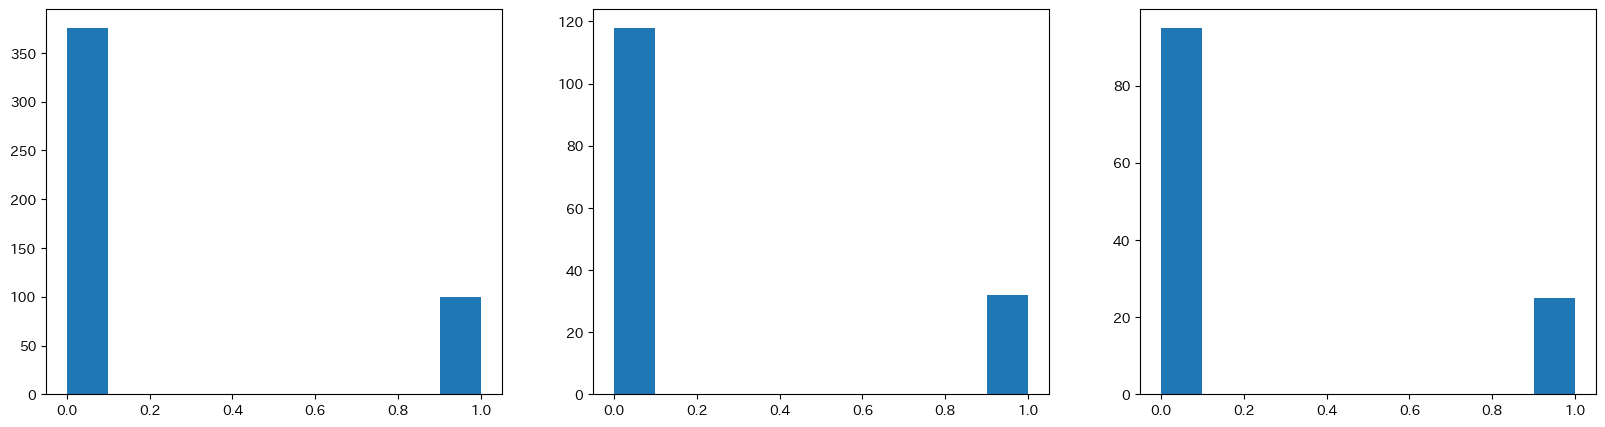

In [250]:
from sklearn.model_selection import StratifiedShuffleSplit

main_data=main_data.drop(['2日前のG数', '2日前の差枚', '2日前のBB回数', '2日前のRB回数', '2日前の合成回数', '2日前の合成確率', '2日前のBB確率', '2日前のRB確率', '3日前のG数', '3日前の差枚', '3日前のBB回数', '3日前のRB回数', '3日前の合成回数', '3日前の合成確率', '3日前のBB確率', '3日前のRB確率'],axis=1)

#対象日をイベ日だけにしたい場合
# target_day_end=9
# main_data = main_data[(main_data['day_end'] == target_day_end)]
#対象機種だけにしたい場合
main_data = main_data[(main_data['機種名'] == "アイムジャグラーEX-TP")]
#特徴量作成
main_data['year'] = main_data['日付'].dt.year #年度
main_data['month'] = main_data['日付'].dt.month #月
main_data['day'] = main_data['日付'].dt.day #日
main_data['weekday'] = main_data['日付'].dt.weekday #曜日
main_data['day_end_2'] = main_data['日付'].astype(str).str[-2].astype(int) #日付2桁目
main_data['day_zoro'] = 0
main_data.loc[main_data['day_end']==main_data['day_end_2'],'day_zoro'] = 1 #ゾロ目を１とする

main_data['machine_end'] = main_data['台番号'].astype(str).str[-1].astype(int) #台番号末尾
main_data['machine_end_2'] = main_data['台番号'].astype(str).str[-2].astype(int) #台番号2桁目
main_data['machine_zoro'] = 0
main_data.loc[main_data['machine_end']==main_data['machine_end_2'],'machine_zoro'] = 1 #台番号ゾロ目を１とする
#設定0を削除してみる
main_data = main_data[main_data['setting'] != 0]

# 高設定を1,それ以外を0とする。
main_data.loc[(main_data['setting'] < 5),'learning_setting'] = 0
main_data.loc[(main_data['setting'] >= 5),'learning_setting'] = 1
display(main_data.head(10))
X = main_data.drop(['learning_setting','日付', 'setting'],axis=1).values
y = main_data['learning_setting'].values
columns_name = main_data.drop(['setting','日付', 'learning_setting'],axis=1).columns
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0) 

def data_split(X,y):
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
    X_train = pd.DataFrame(X_train, columns=columns_name)
    X_test = pd.DataFrame(X_test, columns=columns_name)

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = data_split(X, y)
X_train, y_train, X_val, y_val = data_split(X_train.values, y_train)

print("train shape", X_train.shape)
print("test shape", X_test.shape)
print("validation shape", X_val.shape)
print(X_train.columns, X_test.columns)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(y_train)

plt.subplot(1,3,2)
plt.hist(y_test)

plt.subplot(1,3,3)
plt.hist(y_val)

[I 2023-09-26 12:34:59,396] A new study created in memory with name: no-name-c09c2aac-cd0c-415b-b685-0de04f93a2f7


Index(['機種名', '台番号', 'day_end', '機種台数', '前日のG数', '前日の差枚', '前日のBB回数', '前日のRB回数',
       '前日の合成回数', '前日の合成確率', '前日のBB確率', '前日のRB確率', '前日のG数ランキング', '前日の差枚ランキング',
       '前日の合成回数ランキング', '前日の合成確率ランキング', 'G数過去2日間合計', '差枚過去2日間合計', '合成回数過去2日間合計',
       '合成確率過去2日間平均', 'G数過去3日間合計', '差枚過去3日間合計', '合成回数過去3日間合計', '合成確率過去3日間平均',
       '過去2日間合計G数ランキング', '過去2日間合計差枚ランキング', '過去2日間合計合成回数ランキング',
       '過去2日間平均合成確率ランキング', '過去3日間合計G数ランキング', '過去3日間合計差枚ランキング',
       '過去3日間合計合成回数ランキング', '過去3日間平均合成確率ランキング', 'year', 'month', 'day',
       'weekday', 'day_end_2', 'day_zoro', 'machine_end', 'machine_end_2',
       'machine_zoro'],
      dtype='object')



feature_fraction, val_score: inf:   0%|                                                                                                     | 0/7 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.22
[10]	valid_0's binary_error: 0.22
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.213333
[13]	valid_0's binary_error: 0.206667
[14]	valid_0's binary_error: 0.213333
[15]	valid_0's binary_error: 0.206667
[16]	valid_0's binary_error: 0.206667
[17]	valid_0's binary_error: 0.213333
[18]	valid_0's binary_error: 0.22
[19]	valid_0's binary_error: 0.22
[20]	valid_0's binary_error: 0.213333
[21]	valid_0's binary_error: 0.213333
[22]	valid_0's binary_error: 0.213333
[23]	valid_0's binary_error: 0.213333
[24]	valid_0's binary_error: 0.22
[25]	valid_0's binary_error: 0.22
[26]	valid_0's binary_error: 0.213333
[27]	valid_0's binary_error: 0.213333
[28]	va


feature_fraction, val_score: 0.253333:  14%|############5                                                                           | 1/7 [00:00<00:02,  2.59it/s][I 2023-09-26 12:34:59,790] Trial 0 finished with value: 0.25333333333333335 and parameters: {'feature_fraction': 0.8}. Best is trial 0 with value: 0.25333333333333335.

feature_fraction, val_score: 0.253333:  14%|############5                                                                           | 1/7 [00:00<00:02,  2.59it/s]

[535]	valid_0's binary_error: 0.273333
[536]	valid_0's binary_error: 0.273333
[537]	valid_0's binary_error: 0.273333
[538]	valid_0's binary_error: 0.273333
[539]	valid_0's binary_error: 0.273333
[540]	valid_0's binary_error: 0.273333
[541]	valid_0's binary_error: 0.273333
[542]	valid_0's binary_error: 0.266667
[543]	valid_0's binary_error: 0.266667
[544]	valid_0's binary_error: 0.266667
[545]	valid_0's binary_error: 0.26
[546]	valid_0's binary_error: 0.266667
[547]	valid_0's binary_error: 0.266667
[548]	valid_0's binary_error: 0.266667
[549]	valid_0's binary_error: 0.266667
[550]	valid_0's binary_error: 0.266667
[551]	valid_0's binary_error: 0.266667
[552]	valid_0's binary_error: 0.266667
[553]	valid_0's binary_error: 0.26
[554]	valid_0's binary_error: 0.266667
[555]	valid_0's binary_error: 0.266667
[556]	valid_0's binary_error: 0.266667
[557]	valid_0's binary_error: 0.266667
[558]	valid_0's binary_error: 0.266667
[559]	valid_0's binary_error: 0.266667
[560]	valid_0's binary_error: 0.2


feature_fraction, val_score: 0.240000:  29%|#########################1                                                              | 2/7 [00:00<00:01,  2.56it/s][I 2023-09-26 12:35:00,185] Trial 1 finished with value: 0.24 and parameters: {'feature_fraction': 0.6}. Best is trial 1 with value: 0.24.

feature_fraction, val_score: 0.240000:  29%|#########################1                                                              | 2/7 [00:00<00:01,  2.56it/s]

[760]	valid_0's binary_error: 0.24
[761]	valid_0's binary_error: 0.24
[762]	valid_0's binary_error: 0.24
[763]	valid_0's binary_error: 0.24
[764]	valid_0's binary_error: 0.24
[765]	valid_0's binary_error: 0.24
[766]	valid_0's binary_error: 0.24
[767]	valid_0's binary_error: 0.24
[768]	valid_0's binary_error: 0.24
[769]	valid_0's binary_error: 0.24
[770]	valid_0's binary_error: 0.24
[771]	valid_0's binary_error: 0.24
[772]	valid_0's binary_error: 0.24
[773]	valid_0's binary_error: 0.24
[774]	valid_0's binary_error: 0.24
[775]	valid_0's binary_error: 0.24
[776]	valid_0's binary_error: 0.24
[777]	valid_0's binary_error: 0.24
[778]	valid_0's binary_error: 0.24
[779]	valid_0's binary_error: 0.24
[780]	valid_0's binary_error: 0.24
[781]	valid_0's binary_error: 0.24
[782]	valid_0's binary_error: 0.24
[783]	valid_0's binary_error: 0.24
[784]	valid_0's binary_error: 0.24
[785]	valid_0's binary_error: 0.24
[786]	valid_0's binary_error: 0.24
[787]	valid_0's binary_error: 0.24
[788]	valid_0's bina


feature_fraction, val_score: 0.233333:  43%|#####################################7                                                  | 3/7 [00:01<00:01,  2.42it/s][I 2023-09-26 12:35:00,624] Trial 2 finished with value: 0.23333333333333334 and parameters: {'feature_fraction': 0.7}. Best is trial 2 with value: 0.23333333333333334.

feature_fraction, val_score: 0.233333:  43%|#####################################7                                                  | 3/7 [00:01<00:01,  2.42it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.22
[13]	valid_0's binary_error: 0.226667
[14]	valid_0's binary_error: 0.226667
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.22
[18]	valid_0's binary_error: 0.22
[19]	valid_0's binary_error: 0.22
[20]	valid_0's binary_error: 0.22
[21]	valid_0's binary_error: 0.22
[22]	valid_0's binary_error: 0.22
[23]	valid_0's binary_error: 0.22
[24]	valid_0's binary_error: 0.22
[25]	valid_0's binary_error: 0.22
[26]	valid_0's binary_error: 0.22
[27]	valid_0's binary_error: 0.22
[28]	valid_0's binary_error: 0.


feature_fraction, val_score: 0.233333:  57%|##################################################2                                     | 4/7 [00:01<00:01,  2.46it/s][I 2023-09-26 12:35:01,020] Trial 3 finished with value: 0.26 and parameters: {'feature_fraction': 0.4}. Best is trial 2 with value: 0.23333333333333334.

feature_fraction, val_score: 0.233333:  57%|##################################################2                                     | 4/7 [00:01<00:01,  2.46it/s]

[718]	valid_0's binary_error: 0.266667
[719]	valid_0's binary_error: 0.266667
[720]	valid_0's binary_error: 0.266667
[721]	valid_0's binary_error: 0.266667
[722]	valid_0's binary_error: 0.266667
[723]	valid_0's binary_error: 0.266667
[724]	valid_0's binary_error: 0.266667
[725]	valid_0's binary_error: 0.266667
[726]	valid_0's binary_error: 0.266667
[727]	valid_0's binary_error: 0.266667
[728]	valid_0's binary_error: 0.266667
[729]	valid_0's binary_error: 0.266667
[730]	valid_0's binary_error: 0.266667
[731]	valid_0's binary_error: 0.266667
[732]	valid_0's binary_error: 0.266667
[733]	valid_0's binary_error: 0.266667
[734]	valid_0's binary_error: 0.266667
[735]	valid_0's binary_error: 0.266667
[736]	valid_0's binary_error: 0.266667
[737]	valid_0's binary_error: 0.266667
[738]	valid_0's binary_error: 0.266667
[739]	valid_0's binary_error: 0.266667
[740]	valid_0's binary_error: 0.266667
[741]	valid_0's binary_error: 0.266667
[742]	valid_0's binary_error: 0.266667
[743]	valid_0's binary_er


feature_fraction, val_score: 0.233333:  71%|##############################################################8                         | 5/7 [00:02<00:00,  2.30it/s][I 2023-09-26 12:35:01,506] Trial 4 finished with value: 0.24 and parameters: {'feature_fraction': 1.0}. Best is trial 2 with value: 0.23333333333333334.

feature_fraction, val_score: 0.233333:  71%|##############################################################8                         | 5/7 [00:02<00:00,  2.30it/s]

[963]	valid_0's binary_error: 0.24
[964]	valid_0's binary_error: 0.24
[965]	valid_0's binary_error: 0.24
[966]	valid_0's binary_error: 0.24
[967]	valid_0's binary_error: 0.24
[968]	valid_0's binary_error: 0.24
[969]	valid_0's binary_error: 0.24
[970]	valid_0's binary_error: 0.24
[971]	valid_0's binary_error: 0.24
[972]	valid_0's binary_error: 0.24
[973]	valid_0's binary_error: 0.24
[974]	valid_0's binary_error: 0.24
[975]	valid_0's binary_error: 0.24
[976]	valid_0's binary_error: 0.24
[977]	valid_0's binary_error: 0.24
[978]	valid_0's binary_error: 0.24
[979]	valid_0's binary_error: 0.24
[980]	valid_0's binary_error: 0.24
[981]	valid_0's binary_error: 0.24
[982]	valid_0's binary_error: 0.24
[983]	valid_0's binary_error: 0.24
[984]	valid_0's binary_error: 0.24
[985]	valid_0's binary_error: 0.24
[986]	valid_0's binary_error: 0.24
[987]	valid_0's binary_error: 0.24
[988]	valid_0's binary_error: 0.24
[989]	valid_0's binary_error: 0.24
[990]	valid_0's binary_error: 0.24
[991]	valid_0's bina


feature_fraction, val_score: 0.233333:  86%|###########################################################################4            | 6/7 [00:02<00:00,  2.33it/s][I 2023-09-26 12:35:01,925] Trial 5 finished with value: 0.24 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 2 with value: 0.23333333333333334.

feature_fraction, val_score: 0.233333:  86%|###########################################################################4            | 6/7 [00:02<00:00,  2.33it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.22
[10]	valid_0's binary_error: 0.22
[11]	valid_0's binary_error: 0.226667
[12]	valid_0's binary_error: 0.226667
[13]	valid_0's binary_error: 0.226667
[14]	valid_0's binary_error: 0.233333
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.253333
[17]	valid_0's binary_error: 0.24
[18]	valid_0's binary_error: 0.24
[19]	valid_0's binary_error: 0.246667
[20]	valid_0's binary_error: 0.24
[21]	valid_0's binary_error: 0.24
[22]	valid_0's binary_error: 0.24
[23]	valid_0's binary_error: 0.24
[24]	valid_0's binary_error: 0.246667
[25]	valid_0's binary_error: 0.24
[26]	valid_0's binary_error: 0.24
[27]	valid_0's binary_error: 0.246667
[28]	valid_0's binary_e


feature_fraction, val_score: 0.233333: 100%|########################################################################################| 7/7 [00:02<00:00,  2.45it/s]


[780]	valid_0's binary_error: 0.253333
[781]	valid_0's binary_error: 0.253333
[782]	valid_0's binary_error: 0.253333
[783]	valid_0's binary_error: 0.253333
[784]	valid_0's binary_error: 0.253333
[785]	valid_0's binary_error: 0.253333
[786]	valid_0's binary_error: 0.253333
[787]	valid_0's binary_error: 0.253333
[788]	valid_0's binary_error: 0.253333
[789]	valid_0's binary_error: 0.253333
[790]	valid_0's binary_error: 0.253333
[791]	valid_0's binary_error: 0.253333
[792]	valid_0's binary_error: 0.253333
[793]	valid_0's binary_error: 0.253333
[794]	valid_0's binary_error: 0.253333
[795]	valid_0's binary_error: 0.253333
[796]	valid_0's binary_error: 0.253333
[797]	valid_0's binary_error: 0.253333
[798]	valid_0's binary_error: 0.253333
[799]	valid_0's binary_error: 0.253333
[800]	valid_0's binary_error: 0.253333
[801]	valid_0's binary_error: 0.253333
[802]	valid_0's binary_error: 0.253333
[803]	valid_0's binary_error: 0.253333
[804]	valid_0's binary_error: 0.253333
[805]	valid_0's binary_er


num_leaves, val_score: 0.233333:   0%|                                                                                                     | 0/20 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.233333
[12]	valid_0's binary_error: 0.226667
[13]	valid_0's binary_error: 0.226667
[14]	valid_0's binary_error: 0.226667
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.24
[18]	valid_0's binary_error: 0.233333
[19]	valid_0's binary_error: 0.246667
[20]	valid_0's binary_error: 0.233333
[21]	valid_0's binary_error: 0.246667
[22]	valid_0's binary_error: 0.246667
[23]	valid_0's binary_error: 0.253333
[24]	valid_0's binary_error: 0.253333
[25]	valid_0's binary_error: 0.253333
[26]	valid_0's binary_error: 0.266667
[27]	valid_0's binary_err


num_leaves, val_score: 0.233333:   5%|####6                                                                                        | 1/20 [00:00<00:09,  1.96it/s][I 2023-09-26 12:35:02,775] Trial 7 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 80}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:   5%|####6                                                                                        | 1/20 [00:00<00:09,  1.96it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.233333
[12]	valid_0's binary_error: 0.226667
[13]	valid_0's binary_error: 0.226667
[14]	valid_0's binary_error: 0.226667
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.24
[18]	valid_0's binary_error: 0.233333
[19]	valid_0's binary_error: 0.246667
[20]	valid_0's binary_error: 0.233333
[21]	valid_0's binary_error: 0.246667
[22]	valid_0's binary_error: 0.246667
[23]	valid_0's binary_error: 0.253333
[24]	valid_0's binary_error: 0.253333
[25]	valid_0's binary_error: 0.253333
[26]	valid_0's binary_error: 0.266667
[27]	valid_0's binary_err


num_leaves, val_score: 0.233333:  10%|#########3                                                                                   | 2/20 [00:01<00:09,  1.91it/s][I 2023-09-26 12:35:03,307] Trial 8 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 218}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  10%|#########3                                                                                   | 2/20 [00:01<00:09,  1.91it/s]

[943]	valid_0's binary_error: 0.233333
[944]	valid_0's binary_error: 0.233333
[945]	valid_0's binary_error: 0.233333
[946]	valid_0's binary_error: 0.233333
[947]	valid_0's binary_error: 0.233333
[948]	valid_0's binary_error: 0.233333
[949]	valid_0's binary_error: 0.233333
[950]	valid_0's binary_error: 0.233333
[951]	valid_0's binary_error: 0.233333
[952]	valid_0's binary_error: 0.233333
[953]	valid_0's binary_error: 0.233333
[954]	valid_0's binary_error: 0.233333
[955]	valid_0's binary_error: 0.233333
[956]	valid_0's binary_error: 0.233333
[957]	valid_0's binary_error: 0.233333
[958]	valid_0's binary_error: 0.233333
[959]	valid_0's binary_error: 0.233333
[960]	valid_0's binary_error: 0.233333
[961]	valid_0's binary_error: 0.233333
[962]	valid_0's binary_error: 0.233333
[963]	valid_0's binary_error: 0.233333
[964]	valid_0's binary_error: 0.233333
[965]	valid_0's binary_error: 0.233333
[966]	valid_0's binary_error: 0.233333
[967]	valid_0's binary_error: 0.233333
[968]	valid_0's binary_er


num_leaves, val_score: 0.233333:  15%|#############9                                                                               | 3/20 [00:01<00:06,  2.54it/s][I 2023-09-26 12:35:03,547] Trial 9 finished with value: 0.24666666666666667 and parameters: {'num_leaves': 5}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  15%|#############9                                                                               | 3/20 [00:01<00:06,  2.54it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.233333
[12]	valid_0's binary_error: 0.226667
[13]	valid_0's binary_error: 0.226667
[14]	valid_0's binary_error: 0.226667
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.24
[18]	valid_0's binary_error: 0.233333
[19]	valid_0's binary_error: 0.246667
[20]	valid_0's binary_error: 0.233333
[21]	valid_0's binary_error: 0.246667
[22]	valid_0's binary_error: 0.246667
[23]	valid_0's binary_error: 0.253333
[24]	valid_0's binary_error: 0.253333
[25]	valid_0's binary_error: 0.253333
[26]	valid_0's binary_error: 0.266667
[27]	valid_0's binary_err


num_leaves, val_score: 0.233333:  20%|##################6                                                                          | 4/20 [00:01<00:08,  1.97it/s][I 2023-09-26 12:35:04,228] Trial 10 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 249}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  20%|##################6                                                                          | 4/20 [00:01<00:08,  1.97it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.233333
[12]	valid_0's binary_error: 0.226667
[13]	valid_0's binary_error: 0.226667
[14]	valid_0's binary_error: 0.226667
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.24
[18]	valid_0's binary_error: 0.233333
[19]	valid_0's binary_error: 0.246667
[20]	valid_0's binary_error: 0.233333
[21]	valid_0's binary_error: 0.246667
[22]	valid_0's binary_error: 0.246667
[23]	valid_0's binary_error: 0.253333
[24]	valid_0's binary_error: 0.253333
[25]	valid_0's binary_error: 0.253333
[26]	valid_0's binary_error: 0.266667
[27]	valid_0's binary_err


num_leaves, val_score: 0.233333:  25%|#######################2                                                                     | 5/20 [00:02<00:07,  1.92it/s][I 2023-09-26 12:35:04,775] Trial 11 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 73}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  25%|#######################2                                                                     | 5/20 [00:02<00:07,  1.92it/s]

[888]	valid_0's binary_error: 0.233333
[889]	valid_0's binary_error: 0.233333
[890]	valid_0's binary_error: 0.233333
[891]	valid_0's binary_error: 0.233333
[892]	valid_0's binary_error: 0.233333
[893]	valid_0's binary_error: 0.233333
[894]	valid_0's binary_error: 0.233333
[895]	valid_0's binary_error: 0.233333
[896]	valid_0's binary_error: 0.233333
[897]	valid_0's binary_error: 0.233333
[898]	valid_0's binary_error: 0.233333
[899]	valid_0's binary_error: 0.233333
[900]	valid_0's binary_error: 0.233333
[901]	valid_0's binary_error: 0.233333
[902]	valid_0's binary_error: 0.233333
[903]	valid_0's binary_error: 0.233333
[904]	valid_0's binary_error: 0.233333
[905]	valid_0's binary_error: 0.233333
[906]	valid_0's binary_error: 0.233333
[907]	valid_0's binary_error: 0.233333
[908]	valid_0's binary_error: 0.233333
[909]	valid_0's binary_error: 0.233333
[910]	valid_0's binary_error: 0.233333
[911]	valid_0's binary_error: 0.233333
[912]	valid_0's binary_error: 0.233333
[913]	valid_0's binary_er


num_leaves, val_score: 0.233333:  30%|###########################9                                                                 | 6/20 [00:02<00:07,  1.97it/s][I 2023-09-26 12:35:05,254] Trial 12 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 130}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  30%|###########################9                                                                 | 6/20 [00:02<00:07,  1.97it/s]

[671]	valid_0's binary_error: 0.24
[672]	valid_0's binary_error: 0.24
[673]	valid_0's binary_error: 0.24
[674]	valid_0's binary_error: 0.24
[675]	valid_0's binary_error: 0.24
[676]	valid_0's binary_error: 0.24
[677]	valid_0's binary_error: 0.24
[678]	valid_0's binary_error: 0.24
[679]	valid_0's binary_error: 0.24
[680]	valid_0's binary_error: 0.24
[681]	valid_0's binary_error: 0.24
[682]	valid_0's binary_error: 0.24
[683]	valid_0's binary_error: 0.24
[684]	valid_0's binary_error: 0.24
[685]	valid_0's binary_error: 0.24
[686]	valid_0's binary_error: 0.24
[687]	valid_0's binary_error: 0.24
[688]	valid_0's binary_error: 0.24
[689]	valid_0's binary_error: 0.24
[690]	valid_0's binary_error: 0.24
[691]	valid_0's binary_error: 0.24
[692]	valid_0's binary_error: 0.24
[693]	valid_0's binary_error: 0.24
[694]	valid_0's binary_error: 0.24
[695]	valid_0's binary_error: 0.24
[696]	valid_0's binary_error: 0.24
[697]	valid_0's binary_error: 0.24
[698]	valid_0's binary_error: 0.24
[699]	valid_0's bina


num_leaves, val_score: 0.233333:  35%|################################5                                                            | 7/20 [00:03<00:06,  1.92it/s][I 2023-09-26 12:35:05,806] Trial 13 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 116}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  35%|################################5                                                            | 7/20 [00:03<00:06,  1.92it/s]

[929]	valid_0's binary_error: 0.233333
[930]	valid_0's binary_error: 0.233333
[931]	valid_0's binary_error: 0.233333
[932]	valid_0's binary_error: 0.233333
[933]	valid_0's binary_error: 0.233333
[934]	valid_0's binary_error: 0.233333
[935]	valid_0's binary_error: 0.233333
[936]	valid_0's binary_error: 0.233333
[937]	valid_0's binary_error: 0.233333
[938]	valid_0's binary_error: 0.233333
[939]	valid_0's binary_error: 0.233333
[940]	valid_0's binary_error: 0.233333
[941]	valid_0's binary_error: 0.233333
[942]	valid_0's binary_error: 0.233333
[943]	valid_0's binary_error: 0.233333
[944]	valid_0's binary_error: 0.233333
[945]	valid_0's binary_error: 0.233333
[946]	valid_0's binary_error: 0.233333
[947]	valid_0's binary_error: 0.233333
[948]	valid_0's binary_error: 0.233333
[949]	valid_0's binary_error: 0.233333
[950]	valid_0's binary_error: 0.233333
[951]	valid_0's binary_error: 0.233333
[952]	valid_0's binary_error: 0.233333
[953]	valid_0's binary_error: 0.233333
[954]	valid_0's binary_er


num_leaves, val_score: 0.233333:  40%|#####################################2                                                       | 8/20 [00:04<00:06,  1.97it/s][I 2023-09-26 12:35:06,287] Trial 14 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 31}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  40%|#####################################2                                                       | 8/20 [00:04<00:06,  1.97it/s]

[776]	valid_0's binary_error: 0.24
[777]	valid_0's binary_error: 0.24
[778]	valid_0's binary_error: 0.24
[779]	valid_0's binary_error: 0.24
[780]	valid_0's binary_error: 0.24
[781]	valid_0's binary_error: 0.24
[782]	valid_0's binary_error: 0.24
[783]	valid_0's binary_error: 0.24
[784]	valid_0's binary_error: 0.24
[785]	valid_0's binary_error: 0.24
[786]	valid_0's binary_error: 0.24
[787]	valid_0's binary_error: 0.24
[788]	valid_0's binary_error: 0.24
[789]	valid_0's binary_error: 0.24
[790]	valid_0's binary_error: 0.24
[791]	valid_0's binary_error: 0.24
[792]	valid_0's binary_error: 0.24
[793]	valid_0's binary_error: 0.24
[794]	valid_0's binary_error: 0.24
[795]	valid_0's binary_error: 0.24
[796]	valid_0's binary_error: 0.24
[797]	valid_0's binary_error: 0.24
[798]	valid_0's binary_error: 0.24
[799]	valid_0's binary_error: 0.24
[800]	valid_0's binary_error: 0.24
[801]	valid_0's binary_error: 0.24
[802]	valid_0's binary_error: 0.24
[803]	valid_0's binary_error: 0.24
[804]	valid_0's bina


num_leaves, val_score: 0.233333:  45%|#########################################8                                                   | 9/20 [00:04<00:05,  2.04it/s][I 2023-09-26 12:35:06,733] Trial 15 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 165}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  45%|#########################################8                                                   | 9/20 [00:04<00:05,  2.04it/s]

[698]	valid_0's binary_error: 0.24
[699]	valid_0's binary_error: 0.24
[700]	valid_0's binary_error: 0.24
[701]	valid_0's binary_error: 0.24
[702]	valid_0's binary_error: 0.24
[703]	valid_0's binary_error: 0.24
[704]	valid_0's binary_error: 0.24
[705]	valid_0's binary_error: 0.24
[706]	valid_0's binary_error: 0.24
[707]	valid_0's binary_error: 0.24
[708]	valid_0's binary_error: 0.24
[709]	valid_0's binary_error: 0.24
[710]	valid_0's binary_error: 0.24
[711]	valid_0's binary_error: 0.24
[712]	valid_0's binary_error: 0.24
[713]	valid_0's binary_error: 0.24
[714]	valid_0's binary_error: 0.24
[715]	valid_0's binary_error: 0.24
[716]	valid_0's binary_error: 0.24
[717]	valid_0's binary_error: 0.24
[718]	valid_0's binary_error: 0.24
[719]	valid_0's binary_error: 0.24
[720]	valid_0's binary_error: 0.24
[721]	valid_0's binary_error: 0.24
[722]	valid_0's binary_error: 0.24
[723]	valid_0's binary_error: 0.24
[724]	valid_0's binary_error: 0.24
[725]	valid_0's binary_error: 0.24
[726]	valid_0's bina


num_leaves, val_score: 0.233333:  50%|##############################################                                              | 10/20 [00:04<00:04,  2.16it/s][I 2023-09-26 12:35:07,140] Trial 16 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 73}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  50%|##############################################                                              | 10/20 [00:04<00:04,  2.16it/s]

[574]	valid_0's binary_error: 0.24
[575]	valid_0's binary_error: 0.24
[576]	valid_0's binary_error: 0.24
[577]	valid_0's binary_error: 0.24
[578]	valid_0's binary_error: 0.24
[579]	valid_0's binary_error: 0.24
[580]	valid_0's binary_error: 0.233333
[581]	valid_0's binary_error: 0.233333
[582]	valid_0's binary_error: 0.233333
[583]	valid_0's binary_error: 0.233333
[584]	valid_0's binary_error: 0.233333
[585]	valid_0's binary_error: 0.233333
[586]	valid_0's binary_error: 0.233333
[587]	valid_0's binary_error: 0.233333
[588]	valid_0's binary_error: 0.233333
[589]	valid_0's binary_error: 0.233333
[590]	valid_0's binary_error: 0.233333
[591]	valid_0's binary_error: 0.233333
[592]	valid_0's binary_error: 0.233333
[593]	valid_0's binary_error: 0.233333
[594]	valid_0's binary_error: 0.233333
[595]	valid_0's binary_error: 0.233333
[596]	valid_0's binary_error: 0.233333
[597]	valid_0's binary_error: 0.233333
[598]	valid_0's binary_error: 0.24
[599]	valid_0's binary_error: 0.24
[600]	valid_0's bi


num_leaves, val_score: 0.233333:  55%|##################################################6                                         | 11/20 [00:05<00:03,  2.26it/s][I 2023-09-26 12:35:07,537] Trial 17 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 173}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  55%|##################################################6                                         | 11/20 [00:05<00:03,  2.26it/s]

[570]	valid_0's binary_error: 0.24
[571]	valid_0's binary_error: 0.24
[572]	valid_0's binary_error: 0.24
[573]	valid_0's binary_error: 0.24
[574]	valid_0's binary_error: 0.24
[575]	valid_0's binary_error: 0.24
[576]	valid_0's binary_error: 0.24
[577]	valid_0's binary_error: 0.24
[578]	valid_0's binary_error: 0.24
[579]	valid_0's binary_error: 0.24
[580]	valid_0's binary_error: 0.233333
[581]	valid_0's binary_error: 0.233333
[582]	valid_0's binary_error: 0.233333
[583]	valid_0's binary_error: 0.233333
[584]	valid_0's binary_error: 0.233333
[585]	valid_0's binary_error: 0.233333
[586]	valid_0's binary_error: 0.233333
[587]	valid_0's binary_error: 0.233333
[588]	valid_0's binary_error: 0.233333
[589]	valid_0's binary_error: 0.233333
[590]	valid_0's binary_error: 0.233333
[591]	valid_0's binary_error: 0.233333
[592]	valid_0's binary_error: 0.233333
[593]	valid_0's binary_error: 0.233333
[594]	valid_0's binary_error: 0.233333
[595]	valid_0's binary_error: 0.233333
[596]	valid_0's binary_err


num_leaves, val_score: 0.233333:  60%|#######################################################2                                    | 12/20 [00:05<00:03,  2.27it/s][I 2023-09-26 12:35:07,972] Trial 18 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 69}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  60%|#######################################################2                                    | 12/20 [00:05<00:03,  2.27it/s]

[530]	valid_0's binary_error: 0.24
[531]	valid_0's binary_error: 0.246667
[532]	valid_0's binary_error: 0.24
[533]	valid_0's binary_error: 0.24
[534]	valid_0's binary_error: 0.246667
[535]	valid_0's binary_error: 0.24
[536]	valid_0's binary_error: 0.233333
[537]	valid_0's binary_error: 0.24
[538]	valid_0's binary_error: 0.24
[539]	valid_0's binary_error: 0.24
[540]	valid_0's binary_error: 0.24
[541]	valid_0's binary_error: 0.246667
[542]	valid_0's binary_error: 0.24
[543]	valid_0's binary_error: 0.24
[544]	valid_0's binary_error: 0.24
[545]	valid_0's binary_error: 0.24
[546]	valid_0's binary_error: 0.24
[547]	valid_0's binary_error: 0.24
[548]	valid_0's binary_error: 0.233333
[549]	valid_0's binary_error: 0.233333
[550]	valid_0's binary_error: 0.233333
[551]	valid_0's binary_error: 0.24
[552]	valid_0's binary_error: 0.233333
[553]	valid_0's binary_error: 0.233333
[554]	valid_0's binary_error: 0.233333
[555]	valid_0's binary_error: 0.24
[556]	valid_0's binary_error: 0.24
[557]	valid_0's

[476]	valid_0's binary_error: 0.233333
[477]	valid_0's binary_error: 0.226667
[478]	valid_0's binary_error: 0.226667
[479]	valid_0's binary_error: 0.233333
[480]	valid_0's binary_error: 0.226667
[481]	valid_0's binary_error: 0.233333
[482]	valid_0's binary_error: 0.233333
[483]	valid_0's binary_error: 0.233333
[484]	valid_0's binary_error: 0.233333
[485]	valid_0's binary_error: 0.24
[486]	valid_0's binary_error: 0.233333
[487]	valid_0's binary_error: 0.233333
[488]	valid_0's binary_error: 0.233333
[489]	valid_0's binary_error: 0.233333
[490]	valid_0's binary_error: 0.233333
[491]	valid_0's binary_error: 0.233333
[492]	valid_0's binary_error: 0.233333
[493]	valid_0's binary_error: 0.233333
[494]	valid_0's binary_error: 0.233333
[495]	valid_0's binary_error: 0.233333
[496]	valid_0's binary_error: 0.233333
[497]	valid_0's binary_error: 0.233333
[498]	valid_0's binary_error: 0.233333
[499]	valid_0's binary_error: 0.233333
[500]	valid_0's binary_error: 0.233333
[501]	valid_0's binary_error:

num_leaves, val_score: 0.233333:  65%|###########################################################8                                | 13/20 [00:06<00:03,  2.27it/s][I 2023-09-26 12:35:08,413] Trial 19 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 114}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  65%|###########################################################8                                | 13/20 [00:06<00:03,  2.27it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.233333
[12]	valid_0's binary_error: 0.226667
[13]	valid_0's binary_error: 0.226667
[14]	valid_0's binary_error: 0.226667
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.24
[18]	valid_0's binary_error: 0.233333
[19]	valid_0's binary_error: 0.246667
[20]	valid_0's binary_error: 0.233333
[21]	valid_0's binary_error: 0.246667
[22]	valid_0's binary_error: 0.246667
[23]	valid_0's binary_error: 0.253333
[24]	valid_0's binary_error: 0.253333
[25]	valid_0's binary_error: 0.253333
[26]	valid_0's binary_error: 0.266667
[27]	valid_0's binary_err


num_leaves, val_score: 0.233333:  70%|################################################################3                           | 14/20 [00:06<00:02,  2.40it/s][I 2023-09-26 12:35:08,774] Trial 20 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 43}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  70%|################################################################3                           | 14/20 [00:06<00:02,  2.40it/s]

[733]	valid_0's binary_error: 0.24
[734]	valid_0's binary_error: 0.24
[735]	valid_0's binary_error: 0.24
[736]	valid_0's binary_error: 0.24
[737]	valid_0's binary_error: 0.24
[738]	valid_0's binary_error: 0.24
[739]	valid_0's binary_error: 0.24
[740]	valid_0's binary_error: 0.24
[741]	valid_0's binary_error: 0.24
[742]	valid_0's binary_error: 0.24
[743]	valid_0's binary_error: 0.24
[744]	valid_0's binary_error: 0.24
[745]	valid_0's binary_error: 0.24
[746]	valid_0's binary_error: 0.24
[747]	valid_0's binary_error: 0.24
[748]	valid_0's binary_error: 0.24
[749]	valid_0's binary_error: 0.24
[750]	valid_0's binary_error: 0.24
[751]	valid_0's binary_error: 0.24
[752]	valid_0's binary_error: 0.24
[753]	valid_0's binary_error: 0.24
[754]	valid_0's binary_error: 0.24
[755]	valid_0's binary_error: 0.24
[756]	valid_0's binary_error: 0.24
[757]	valid_0's binary_error: 0.24
[758]	valid_0's binary_error: 0.24
[759]	valid_0's binary_error: 0.24
[760]	valid_0's binary_error: 0.24
[761]	valid_0's bina


num_leaves, val_score: 0.233333:  75%|#####################################################################                       | 15/20 [00:06<00:02,  2.46it/s][I 2023-09-26 12:35:09,154] Trial 21 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 245}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  75%|#####################################################################                       | 15/20 [00:06<00:02,  2.46it/s]

[838]	valid_0's binary_error: 0.24
[839]	valid_0's binary_error: 0.24
[840]	valid_0's binary_error: 0.24
[841]	valid_0's binary_error: 0.24
[842]	valid_0's binary_error: 0.24
[843]	valid_0's binary_error: 0.24
[844]	valid_0's binary_error: 0.24
[845]	valid_0's binary_error: 0.24
[846]	valid_0's binary_error: 0.24
[847]	valid_0's binary_error: 0.24
[848]	valid_0's binary_error: 0.24
[849]	valid_0's binary_error: 0.24
[850]	valid_0's binary_error: 0.24
[851]	valid_0's binary_error: 0.24
[852]	valid_0's binary_error: 0.24
[853]	valid_0's binary_error: 0.24
[854]	valid_0's binary_error: 0.24
[855]	valid_0's binary_error: 0.24
[856]	valid_0's binary_error: 0.24
[857]	valid_0's binary_error: 0.24
[858]	valid_0's binary_error: 0.24
[859]	valid_0's binary_error: 0.233333
[860]	valid_0's binary_error: 0.233333
[861]	valid_0's binary_error: 0.233333
[862]	valid_0's binary_error: 0.233333
[863]	valid_0's binary_error: 0.233333
[864]	valid_0's binary_error: 0.233333
[865]	valid_0's binary_error: 0


num_leaves, val_score: 0.233333:  80%|#########################################################################6                  | 16/20 [00:07<00:01,  2.48it/s][I 2023-09-26 12:35:09,554] Trial 22 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 204}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  80%|#########################################################################6                  | 16/20 [00:07<00:01,  2.48it/s]

[937]	valid_0's binary_error: 0.233333
[938]	valid_0's binary_error: 0.233333
[939]	valid_0's binary_error: 0.233333
[940]	valid_0's binary_error: 0.233333
[941]	valid_0's binary_error: 0.233333
[942]	valid_0's binary_error: 0.233333
[943]	valid_0's binary_error: 0.233333
[944]	valid_0's binary_error: 0.233333
[945]	valid_0's binary_error: 0.233333
[946]	valid_0's binary_error: 0.233333
[947]	valid_0's binary_error: 0.233333
[948]	valid_0's binary_error: 0.233333
[949]	valid_0's binary_error: 0.233333
[950]	valid_0's binary_error: 0.233333
[951]	valid_0's binary_error: 0.233333
[952]	valid_0's binary_error: 0.233333
[953]	valid_0's binary_error: 0.233333
[954]	valid_0's binary_error: 0.233333
[955]	valid_0's binary_error: 0.233333
[956]	valid_0's binary_error: 0.233333
[957]	valid_0's binary_error: 0.233333
[958]	valid_0's binary_error: 0.233333
[959]	valid_0's binary_error: 0.233333
[960]	valid_0's binary_error: 0.233333
[961]	valid_0's binary_error: 0.233333
[962]	valid_0's binary_er


num_leaves, val_score: 0.233333:  85%|##############################################################################2             | 17/20 [00:07<00:01,  2.56it/s]

[291]	valid_0's binary_error: 0.233333
[292]	valid_0's binary_error: 0.233333
[293]	valid_0's binary_error: 0.233333
[294]	valid_0's binary_error: 0.233333
[295]	valid_0's binary_error: 0.233333
[296]	valid_0's binary_error: 0.233333
[297]	valid_0's binary_error: 0.233333
[298]	valid_0's binary_error: 0.233333
[299]	valid_0's binary_error: 0.233333
[300]	valid_0's binary_error: 0.233333
[301]	valid_0's binary_error: 0.233333
[302]	valid_0's binary_error: 0.226667
[303]	valid_0's binary_error: 0.24
[304]	valid_0's binary_error: 0.233333
[305]	valid_0's binary_error: 0.233333
[306]	valid_0's binary_error: 0.233333
[307]	valid_0's binary_error: 0.233333
[308]	valid_0's binary_error: 0.233333
[309]	valid_0's binary_error: 0.233333
[310]	valid_0's binary_error: 0.233333
[311]	valid_0's binary_error: 0.233333
[312]	valid_0's binary_error: 0.233333
[313]	valid_0's binary_error: 0.233333
[314]	valid_0's binary_error: 0.233333
[315]	valid_0's binary_error: 0.233333
[316]	valid_0's binary_error:

[I 2023-09-26 12:35:09,913] Trial 23 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 213}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  85%|##############################################################################2             | 17/20 [00:07<00:01,  2.56it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.233333
[12]	valid_0's binary_error: 0.226667
[13]	valid_0's binary_error: 0.226667
[14]	valid_0's binary_error: 0.226667
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.24
[18]	valid_0's binary_error: 0.233333
[19]	valid_0's binary_error: 0.246667
[20]	valid_0's binary_error: 0.233333
[21]	valid_0's binary_error: 0.246667
[22]	valid_0's binary_error: 0.246667
[23]	valid_0's binary_error: 0.253333
[24]	valid_0's binary_error: 0.253333
[25]	valid_0's binary_error: 0.253333
[26]	valid_0's binary_error: 0.266667
[27]	valid_0's binary_err


num_leaves, val_score: 0.233333:  90%|##################################################################################8         | 18/20 [00:07<00:00,  2.67it/s][I 2023-09-26 12:35:10,250] Trial 24 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 145}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  90%|##################################################################################8         | 18/20 [00:07<00:00,  2.67it/s]

[600]	valid_0's binary_error: 0.233333
[601]	valid_0's binary_error: 0.24
[602]	valid_0's binary_error: 0.24
[603]	valid_0's binary_error: 0.24
[604]	valid_0's binary_error: 0.24
[605]	valid_0's binary_error: 0.24
[606]	valid_0's binary_error: 0.24
[607]	valid_0's binary_error: 0.24
[608]	valid_0's binary_error: 0.233333
[609]	valid_0's binary_error: 0.24
[610]	valid_0's binary_error: 0.24
[611]	valid_0's binary_error: 0.24
[612]	valid_0's binary_error: 0.24
[613]	valid_0's binary_error: 0.24
[614]	valid_0's binary_error: 0.24
[615]	valid_0's binary_error: 0.24
[616]	valid_0's binary_error: 0.24
[617]	valid_0's binary_error: 0.24
[618]	valid_0's binary_error: 0.24
[619]	valid_0's binary_error: 0.24
[620]	valid_0's binary_error: 0.24
[621]	valid_0's binary_error: 0.24
[622]	valid_0's binary_error: 0.24
[623]	valid_0's binary_error: 0.24
[624]	valid_0's binary_error: 0.24
[625]	valid_0's binary_error: 0.24
[626]	valid_0's binary_error: 0.24
[627]	valid_0's binary_error: 0.24
[628]	valid_


num_leaves, val_score: 0.233333:  95%|#######################################################################################3    | 19/20 [00:08<00:00,  2.61it/s][I 2023-09-26 12:35:10,652] Trial 25 finished with value: 0.23333333333333334 and parameters: {'num_leaves': 210}. Best is trial 7 with value: 0.23333333333333334.

num_leaves, val_score: 0.233333:  95%|#######################################################################################3    | 19/20 [00:08<00:00,  2.61it/s]

[668]	valid_0's binary_error: 0.24
[669]	valid_0's binary_error: 0.24
[670]	valid_0's binary_error: 0.24
[671]	valid_0's binary_error: 0.24
[672]	valid_0's binary_error: 0.24
[673]	valid_0's binary_error: 0.24
[674]	valid_0's binary_error: 0.24
[675]	valid_0's binary_error: 0.24
[676]	valid_0's binary_error: 0.24
[677]	valid_0's binary_error: 0.24
[678]	valid_0's binary_error: 0.24
[679]	valid_0's binary_error: 0.24
[680]	valid_0's binary_error: 0.24
[681]	valid_0's binary_error: 0.24
[682]	valid_0's binary_error: 0.24
[683]	valid_0's binary_error: 0.24
[684]	valid_0's binary_error: 0.24
[685]	valid_0's binary_error: 0.24
[686]	valid_0's binary_error: 0.24
[687]	valid_0's binary_error: 0.24
[688]	valid_0's binary_error: 0.24
[689]	valid_0's binary_error: 0.24
[690]	valid_0's binary_error: 0.24
[691]	valid_0's binary_error: 0.24
[692]	valid_0's binary_error: 0.24
[693]	valid_0's binary_error: 0.24
[694]	valid_0's binary_error: 0.24
[695]	valid_0's binary_error: 0.24
[696]	valid_0's bina


num_leaves, val_score: 0.233333: 100%|############################################################################################| 20/20 [00:09<00:00,  2.02it/s]


[885]	valid_0's binary_error: 0.233333
[886]	valid_0's binary_error: 0.233333
[887]	valid_0's binary_error: 0.233333
[888]	valid_0's binary_error: 0.233333
[889]	valid_0's binary_error: 0.233333
[890]	valid_0's binary_error: 0.233333
[891]	valid_0's binary_error: 0.233333
[892]	valid_0's binary_error: 0.233333
[893]	valid_0's binary_error: 0.233333
[894]	valid_0's binary_error: 0.233333
[895]	valid_0's binary_error: 0.233333
[896]	valid_0's binary_error: 0.233333
[897]	valid_0's binary_error: 0.233333
[898]	valid_0's binary_error: 0.233333
[899]	valid_0's binary_error: 0.233333
[900]	valid_0's binary_error: 0.233333
[901]	valid_0's binary_error: 0.233333
[902]	valid_0's binary_error: 0.233333
[903]	valid_0's binary_error: 0.233333
[904]	valid_0's binary_error: 0.233333
[905]	valid_0's binary_error: 0.233333
[906]	valid_0's binary_error: 0.233333
[907]	valid_0's binary_error: 0.233333
[908]	valid_0's binary_error: 0.233333
[909]	valid_0's binary_error: 0.233333
[910]	valid_0's binary_er


bagging, val_score: 0.233333:   0%|                                                                                                        | 0/10 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.22
[13]	valid_0's binary_error: 0.22
[14]	valid_0's binary_error: 0.213333
[15]	valid_0's binary_error: 0.206667
[16]	valid_0's binary_error: 0.206667
[17]	valid_0's binary_error: 0.206667
[18]	valid_0's binary_error: 0.213333
[19]	valid_0's binary_error: 0.22
[20]	valid_0's binary_error: 0.22
[21]	valid_0's binary_error: 0.226667
[22]	valid_0's binary_error: 0.22
[23]	valid_0's binary_error: 0.226667
[24]	valid_0's binary_error: 0.22
[25]	valid_0's binary_error: 0.213333
[26]	valid_0's binary_error: 0.213333
[27]	valid_0's binary_error: 0.213333
[28]	va


bagging, val_score: 0.233333:  10%|#########6                                                                                      | 1/10 [00:00<00:03,  2.89it/s]

[594]	valid_0's binary_error: 0.24
[595]	valid_0's binary_error: 0.24
[596]	valid_0's binary_error: 0.233333
[597]	valid_0's binary_error: 0.233333
[598]	valid_0's binary_error: 0.233333
[599]	valid_0's binary_error: 0.246667
[600]	valid_0's binary_error: 0.246667
[601]	valid_0's binary_error: 0.246667
[602]	valid_0's binary_error: 0.246667
[603]	valid_0's binary_error: 0.246667
[604]	valid_0's binary_error: 0.246667
[605]	valid_0's binary_error: 0.246667
[606]	valid_0's binary_error: 0.24
[607]	valid_0's binary_error: 0.24
[608]	valid_0's binary_error: 0.24
[609]	valid_0's binary_error: 0.24
[610]	valid_0's binary_error: 0.24
[611]	valid_0's binary_error: 0.24
[612]	valid_0's binary_error: 0.24
[613]	valid_0's binary_error: 0.24
[614]	valid_0's binary_error: 0.24
[615]	valid_0's binary_error: 0.24
[616]	valid_0's binary_error: 0.24
[617]	valid_0's binary_error: 0.24
[618]	valid_0's binary_error: 0.24
[619]	valid_0's binary_error: 0.24
[620]	valid_0's binary_error: 0.24
[621]	valid_0's

[I 2023-09-26 12:35:12,534] Trial 27 finished with value: 0.24666666666666667 and parameters: {'bagging_fraction': 0.9467166661164486, 'bagging_freq': 7}. Best is trial 27 with value: 0.24666666666666667.

bagging, val_score: 0.233333:  10%|#########6                                                                                      | 1/10 [00:00<00:03,  2.89it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.213333
[13]	valid_0's binary_error: 0.213333
[14]	valid_0's binary_error: 0.213333
[15]	valid_0's binary_error: 0.22
[16]	valid_0's binary_error: 0.226667
[17]	valid_0's binary_error: 0.226667
[18]	valid_0's binary_error: 0.213333
[19]	valid_0's binary_error: 0.22
[20]	valid_0's binary_error: 0.213333
[21]	valid_0's binary_error: 0.213333
[22]	valid_0's binary_error: 0.213333
[23]	valid_0's binary_error: 0.2
[24]	valid_0's binary_error: 0.206667
[25]	valid_0's binary_error: 0.2
[26]	valid_0's binary_error: 0.2
[27]	valid_0's binary_error: 0.206667
[28]	v


bagging, val_score: 0.233333:  20%|###################2                                                                            | 2/10 [00:00<00:02,  2.89it/s][I 2023-09-26 12:35:12,878] Trial 28 finished with value: 0.24 and parameters: {'bagging_fraction': 0.40259703631995963, 'bagging_freq': 1}. Best is trial 28 with value: 0.24.

bagging, val_score: 0.233333:  20%|###################2                                                                            | 2/10 [00:00<00:02,  2.89it/s]

[788]	valid_0's binary_error: 0.24
[789]	valid_0's binary_error: 0.24
[790]	valid_0's binary_error: 0.24
[791]	valid_0's binary_error: 0.24
[792]	valid_0's binary_error: 0.24
[793]	valid_0's binary_error: 0.24
[794]	valid_0's binary_error: 0.24
[795]	valid_0's binary_error: 0.24
[796]	valid_0's binary_error: 0.24
[797]	valid_0's binary_error: 0.24
[798]	valid_0's binary_error: 0.24
[799]	valid_0's binary_error: 0.24
[800]	valid_0's binary_error: 0.24
[801]	valid_0's binary_error: 0.24
[802]	valid_0's binary_error: 0.24
[803]	valid_0's binary_error: 0.24
[804]	valid_0's binary_error: 0.24
[805]	valid_0's binary_error: 0.24
[806]	valid_0's binary_error: 0.24
[807]	valid_0's binary_error: 0.24
[808]	valid_0's binary_error: 0.24
[809]	valid_0's binary_error: 0.24
[810]	valid_0's binary_error: 0.24
[811]	valid_0's binary_error: 0.24
[812]	valid_0's binary_error: 0.24
[813]	valid_0's binary_error: 0.24
[814]	valid_0's binary_error: 0.24
[815]	valid_0's binary_error: 0.24
[816]	valid_0's bina


bagging, val_score: 0.233333:  30%|############################8                                                                   | 3/10 [00:01<00:02,  2.88it/s][I 2023-09-26 12:35:13,229] Trial 29 finished with value: 0.25333333333333335 and parameters: {'bagging_fraction': 0.6950662477828069, 'bagging_freq': 4}. Best is trial 28 with value: 0.24.

bagging, val_score: 0.233333:  30%|############################8                                                                   | 3/10 [00:01<00:02,  2.88it/s]

[960]	valid_0's binary_error: 0.253333
[961]	valid_0's binary_error: 0.253333
[962]	valid_0's binary_error: 0.253333
[963]	valid_0's binary_error: 0.253333
[964]	valid_0's binary_error: 0.253333
[965]	valid_0's binary_error: 0.253333
[966]	valid_0's binary_error: 0.253333
[967]	valid_0's binary_error: 0.253333
[968]	valid_0's binary_error: 0.253333
[969]	valid_0's binary_error: 0.253333
[970]	valid_0's binary_error: 0.253333
[971]	valid_0's binary_error: 0.253333
[972]	valid_0's binary_error: 0.253333
[973]	valid_0's binary_error: 0.253333
[974]	valid_0's binary_error: 0.253333
[975]	valid_0's binary_error: 0.253333
[976]	valid_0's binary_error: 0.253333
[977]	valid_0's binary_error: 0.253333
[978]	valid_0's binary_error: 0.253333
[979]	valid_0's binary_error: 0.253333
[980]	valid_0's binary_error: 0.246667
[981]	valid_0's binary_error: 0.253333
[982]	valid_0's binary_error: 0.253333
[983]	valid_0's binary_error: 0.246667
[984]	valid_0's binary_error: 0.246667
[985]	valid_0's binary_er


bagging, val_score: 0.233333:  40%|######################################4                                                         | 4/10 [00:01<00:02,  2.67it/s][I 2023-09-26 12:35:13,645] Trial 30 finished with value: 0.23333333333333334 and parameters: {'bagging_fraction': 0.9574665920899479, 'bagging_freq': 7}. Best is trial 30 with value: 0.23333333333333334.

bagging, val_score: 0.233333:  40%|######################################4                                                         | 4/10 [00:01<00:02,  2.67it/s]

[1000]	valid_0's binary_error: 0.233333
[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.213333
[13]	valid_0's binary_error: 0.213333
[14]	valid_0's binary_error: 0.226667
[15]	valid_0's binary_error: 0.22
[16]	valid_0's binary_error: 0.226667
[17]	valid_0's binary_error: 0.233333
[18]	valid_0's binary_error: 0.226667
[19]	valid_0's binary_error: 0.22
[20]	valid_0's binary_error: 0.233333
[21]	valid_0's binary_error: 0.24
[22]	valid_0's binary_error: 0.233333
[23]	valid_0's binary_error: 0.24
[24]	valid_0's binary_error: 0.233333
[25]	valid_0's binary_error: 0.226667
[26]	valid_0's binary_error: 0.2266


bagging, val_score: 0.220000:  50%|################################################                                                | 5/10 [00:01<00:01,  2.80it/s][I 2023-09-26 12:35:13,971] Trial 31 finished with value: 0.22 and parameters: {'bagging_fraction': 0.42706162793189106, 'bagging_freq': 1}. Best is trial 31 with value: 0.22.

bagging, val_score: 0.220000:  50%|################################################                                                | 5/10 [00:01<00:01,  2.80it/s]

[920]	valid_0's binary_error: 0.213333
[921]	valid_0's binary_error: 0.213333
[922]	valid_0's binary_error: 0.213333
[923]	valid_0's binary_error: 0.213333
[924]	valid_0's binary_error: 0.213333
[925]	valid_0's binary_error: 0.213333
[926]	valid_0's binary_error: 0.213333
[927]	valid_0's binary_error: 0.213333
[928]	valid_0's binary_error: 0.213333
[929]	valid_0's binary_error: 0.213333
[930]	valid_0's binary_error: 0.213333
[931]	valid_0's binary_error: 0.213333
[932]	valid_0's binary_error: 0.213333
[933]	valid_0's binary_error: 0.213333
[934]	valid_0's binary_error: 0.213333
[935]	valid_0's binary_error: 0.213333
[936]	valid_0's binary_error: 0.213333
[937]	valid_0's binary_error: 0.213333
[938]	valid_0's binary_error: 0.213333
[939]	valid_0's binary_error: 0.213333
[940]	valid_0's binary_error: 0.213333
[941]	valid_0's binary_error: 0.213333
[942]	valid_0's binary_error: 0.213333
[943]	valid_0's binary_error: 0.213333
[944]	valid_0's binary_error: 0.213333
[945]	valid_0's binary_er


bagging, val_score: 0.220000:  60%|#########################################################6                                      | 6/10 [00:02<00:01,  2.59it/s][I 2023-09-26 12:35:14,413] Trial 32 finished with value: 0.24 and parameters: {'bagging_fraction': 0.44704265879283206, 'bagging_freq': 1}. Best is trial 31 with value: 0.22.

bagging, val_score: 0.220000:  60%|#########################################################6                                      | 6/10 [00:02<00:01,  2.59it/s]

[787]	valid_0's binary_error: 0.226667
[788]	valid_0's binary_error: 0.22
[789]	valid_0's binary_error: 0.226667
[790]	valid_0's binary_error: 0.233333
[791]	valid_0's binary_error: 0.233333
[792]	valid_0's binary_error: 0.233333
[793]	valid_0's binary_error: 0.233333
[794]	valid_0's binary_error: 0.233333
[795]	valid_0's binary_error: 0.226667
[796]	valid_0's binary_error: 0.226667
[797]	valid_0's binary_error: 0.22
[798]	valid_0's binary_error: 0.226667
[799]	valid_0's binary_error: 0.226667
[800]	valid_0's binary_error: 0.233333
[801]	valid_0's binary_error: 0.233333
[802]	valid_0's binary_error: 0.226667
[803]	valid_0's binary_error: 0.226667
[804]	valid_0's binary_error: 0.226667
[805]	valid_0's binary_error: 0.226667
[806]	valid_0's binary_error: 0.233333
[807]	valid_0's binary_error: 0.22
[808]	valid_0's binary_error: 0.22
[809]	valid_0's binary_error: 0.22
[810]	valid_0's binary_error: 0.226667
[811]	valid_0's binary_error: 0.226667
[812]	valid_0's binary_error: 0.22
[813]	vali


bagging, val_score: 0.206667:  70%|###################################################################1                            | 7/10 [00:02<00:01,  2.68it/s][I 2023-09-26 12:35:14,761] Trial 33 finished with value: 0.20666666666666667 and parameters: {'bagging_fraction': 0.5690494230282317, 'bagging_freq': 3}. Best is trial 33 with value: 0.20666666666666667.

bagging, val_score: 0.206667:  70%|###################################################################1                            | 7/10 [00:02<00:01,  2.68it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.226667
[10]	valid_0's binary_error: 0.226667
[11]	valid_0's binary_error: 0.226667
[12]	valid_0's binary_error: 0.22
[13]	valid_0's binary_error: 0.22
[14]	valid_0's binary_error: 0.22
[15]	valid_0's binary_error: 0.22
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.246667
[18]	valid_0's binary_error: 0.22
[19]	valid_0's binary_error: 0.24
[20]	valid_0's binary_error: 0.24
[21]	valid_0's binary_error: 0.246667
[22]	valid_0's binary_error: 0.246667
[23]	valid_0's binary_error: 0.246667
[24]	valid_0's binary_error: 0.246667
[25]	valid_0's binary_error: 0.253333
[26]	valid_0's binary_error: 0.226667
[27]	valid_0's binary_error: 0.226667
[28]	valid_


bagging, val_score: 0.206667:  80%|############################################################################8                   | 8/10 [00:02<00:00,  2.85it/s][I 2023-09-26 12:35:15,065] Trial 34 finished with value: 0.23333333333333334 and parameters: {'bagging_fraction': 0.5343264278373122, 'bagging_freq': 3}. Best is trial 33 with value: 0.20666666666666667.

bagging, val_score: 0.206667:  80%|############################################################################8                   | 8/10 [00:02<00:00,  2.85it/s]

[880]	valid_0's binary_error: 0.24
[881]	valid_0's binary_error: 0.24
[882]	valid_0's binary_error: 0.24
[883]	valid_0's binary_error: 0.24
[884]	valid_0's binary_error: 0.24
[885]	valid_0's binary_error: 0.24
[886]	valid_0's binary_error: 0.24
[887]	valid_0's binary_error: 0.24
[888]	valid_0's binary_error: 0.24
[889]	valid_0's binary_error: 0.24
[890]	valid_0's binary_error: 0.24
[891]	valid_0's binary_error: 0.24
[892]	valid_0's binary_error: 0.24
[893]	valid_0's binary_error: 0.246667
[894]	valid_0's binary_error: 0.246667
[895]	valid_0's binary_error: 0.246667
[896]	valid_0's binary_error: 0.246667
[897]	valid_0's binary_error: 0.246667
[898]	valid_0's binary_error: 0.24
[899]	valid_0's binary_error: 0.24
[900]	valid_0's binary_error: 0.24
[901]	valid_0's binary_error: 0.24
[902]	valid_0's binary_error: 0.24
[903]	valid_0's binary_error: 0.24
[904]	valid_0's binary_error: 0.24
[905]	valid_0's binary_error: 0.24
[906]	valid_0's binary_error: 0.24
[907]	valid_0's binary_error: 0.24



bagging, val_score: 0.206667:  90%|######################################################################################4         | 9/10 [00:03<00:00,  2.93it/s][I 2023-09-26 12:35:15,383] Trial 35 finished with value: 0.24 and parameters: {'bagging_fraction': 0.5657544498644883, 'bagging_freq': 3}. Best is trial 33 with value: 0.20666666666666667.

bagging, val_score: 0.206667:  90%|######################################################################################4         | 9/10 [00:03<00:00,  2.93it/s]

[920]	valid_0's binary_error: 0.233333
[921]	valid_0's binary_error: 0.233333
[922]	valid_0's binary_error: 0.233333
[923]	valid_0's binary_error: 0.233333
[924]	valid_0's binary_error: 0.233333
[925]	valid_0's binary_error: 0.233333
[926]	valid_0's binary_error: 0.233333
[927]	valid_0's binary_error: 0.233333
[928]	valid_0's binary_error: 0.233333
[929]	valid_0's binary_error: 0.233333
[930]	valid_0's binary_error: 0.233333
[931]	valid_0's binary_error: 0.226667
[932]	valid_0's binary_error: 0.226667
[933]	valid_0's binary_error: 0.233333
[934]	valid_0's binary_error: 0.233333
[935]	valid_0's binary_error: 0.233333
[936]	valid_0's binary_error: 0.233333
[937]	valid_0's binary_error: 0.233333
[938]	valid_0's binary_error: 0.233333
[939]	valid_0's binary_error: 0.233333
[940]	valid_0's binary_error: 0.233333
[941]	valid_0's binary_error: 0.233333
[942]	valid_0's binary_error: 0.233333
[943]	valid_0's binary_error: 0.233333
[944]	valid_0's binary_error: 0.233333
[945]	valid_0's binary_er


bagging, val_score: 0.206667: 100%|###############################################################################################| 10/10 [00:03<00:00,  2.56it/s]

feature_fraction_stage2, val_score: 0.206667:   0%|                                                                                         | 0/6 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.226667
[10]	valid_0's binary_error: 0.233333
[11]	valid_0's binary_error: 0.233333
[12]	valid_0's binary_error: 0.233333
[13]	valid_0's binary_error: 0.233333
[14]	valid_0's binary_error: 0.233333
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.24
[17]	valid_0's binary_error: 0.246667
[18]	valid_0's binary_error: 0.246667
[19]	valid_0's binary_error: 0.24
[20]	valid_0's binary_error: 0.24
[21]	valid_0's binary_error: 0.24
[22]	valid_0's binary_error: 0.233333
[23]	valid_0's binary_error: 0.233333
[24]	valid_0's binary_error: 0.24
[25]	valid_0's binary_error: 0.24
[26]	valid_0's binary_error: 0.24
[27]	valid_0's binary_error: 0.24
[28]	valid_0's 


feature_fraction_stage2, val_score: 0.206667:  17%|#############5                                                                   | 1/6 [00:02<00:14,  3.00s/it][I 2023-09-26 12:35:19,090] Trial 37 finished with value: 0.24666666666666667 and parameters: {'feature_fraction': 0.748}. Best is trial 37 with value: 0.24666666666666667.

feature_fraction_stage2, val_score: 0.206667:  17%|#############5                                                                   | 1/6 [00:03<00:14,  3.00s/it]

[902]	valid_0's binary_error: 0.246667
[903]	valid_0's binary_error: 0.246667
[904]	valid_0's binary_error: 0.246667
[905]	valid_0's binary_error: 0.246667
[906]	valid_0's binary_error: 0.246667
[907]	valid_0's binary_error: 0.246667
[908]	valid_0's binary_error: 0.246667
[909]	valid_0's binary_error: 0.246667
[910]	valid_0's binary_error: 0.246667
[911]	valid_0's binary_error: 0.246667
[912]	valid_0's binary_error: 0.246667
[913]	valid_0's binary_error: 0.246667
[914]	valid_0's binary_error: 0.246667
[915]	valid_0's binary_error: 0.246667
[916]	valid_0's binary_error: 0.246667
[917]	valid_0's binary_error: 0.246667
[918]	valid_0's binary_error: 0.246667
[919]	valid_0's binary_error: 0.246667
[920]	valid_0's binary_error: 0.246667
[921]	valid_0's binary_error: 0.246667
[922]	valid_0's binary_error: 0.246667
[923]	valid_0's binary_error: 0.246667
[924]	valid_0's binary_error: 0.246667
[925]	valid_0's binary_error: 0.246667
[926]	valid_0's binary_error: 0.246667
[927]	valid_0's binary_er


feature_fraction_stage2, val_score: 0.206667:  33%|###########################                                                      | 2/6 [00:03<00:05,  1.47s/it][I 2023-09-26 12:35:19,492] Trial 38 finished with value: 0.24 and parameters: {'feature_fraction': 0.7799999999999999}. Best is trial 38 with value: 0.24.

feature_fraction_stage2, val_score: 0.206667:  33%|###########################                                                      | 2/6 [00:03<00:05,  1.47s/it]

[858]	valid_0's binary_error: 0.233333
[859]	valid_0's binary_error: 0.24
[860]	valid_0's binary_error: 0.233333
[861]	valid_0's binary_error: 0.233333
[862]	valid_0's binary_error: 0.233333
[863]	valid_0's binary_error: 0.233333
[864]	valid_0's binary_error: 0.233333
[865]	valid_0's binary_error: 0.233333
[866]	valid_0's binary_error: 0.233333
[867]	valid_0's binary_error: 0.226667
[868]	valid_0's binary_error: 0.226667
[869]	valid_0's binary_error: 0.226667
[870]	valid_0's binary_error: 0.226667
[871]	valid_0's binary_error: 0.226667
[872]	valid_0's binary_error: 0.226667
[873]	valid_0's binary_error: 0.233333
[874]	valid_0's binary_error: 0.233333
[875]	valid_0's binary_error: 0.233333
[876]	valid_0's binary_error: 0.226667
[877]	valid_0's binary_error: 0.226667
[878]	valid_0's binary_error: 0.226667
[879]	valid_0's binary_error: 0.226667
[880]	valid_0's binary_error: 0.226667
[881]	valid_0's binary_error: 0.233333
[882]	valid_0's binary_error: 0.226667
[883]	valid_0's binary_error:


feature_fraction_stage2, val_score: 0.206667:  50%|########################################5                                        | 3/6 [00:03<00:02,  1.02it/s][I 2023-09-26 12:35:19,890] Trial 39 finished with value: 0.23333333333333334 and parameters: {'feature_fraction': 0.6839999999999999}. Best is trial 39 with value: 0.23333333333333334.

feature_fraction_stage2, val_score: 0.206667:  50%|########################################5                                        | 3/6 [00:03<00:02,  1.02it/s]

[857]	valid_0's binary_error: 0.226667
[858]	valid_0's binary_error: 0.226667
[859]	valid_0's binary_error: 0.226667
[860]	valid_0's binary_error: 0.226667
[861]	valid_0's binary_error: 0.226667
[862]	valid_0's binary_error: 0.226667
[863]	valid_0's binary_error: 0.226667
[864]	valid_0's binary_error: 0.226667
[865]	valid_0's binary_error: 0.233333
[866]	valid_0's binary_error: 0.233333
[867]	valid_0's binary_error: 0.226667
[868]	valid_0's binary_error: 0.22
[869]	valid_0's binary_error: 0.22
[870]	valid_0's binary_error: 0.22
[871]	valid_0's binary_error: 0.22
[872]	valid_0's binary_error: 0.22
[873]	valid_0's binary_error: 0.22
[874]	valid_0's binary_error: 0.226667
[875]	valid_0's binary_error: 0.226667
[876]	valid_0's binary_error: 0.226667
[877]	valid_0's binary_error: 0.226667
[878]	valid_0's binary_error: 0.226667
[879]	valid_0's binary_error: 0.226667
[880]	valid_0's binary_error: 0.226667
[881]	valid_0's binary_error: 0.233333
[882]	valid_0's binary_error: 0.233333
[883]	vali


feature_fraction_stage2, val_score: 0.206667:  67%|######################################################                           | 4/6 [00:04<00:01,  1.36it/s][I 2023-09-26 12:35:20,256] Trial 40 finished with value: 0.24666666666666667 and parameters: {'feature_fraction': 0.62}. Best is trial 39 with value: 0.23333333333333334.

feature_fraction_stage2, val_score: 0.206667:  67%|######################################################                           | 4/6 [00:04<00:01,  1.36it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.226667
[10]	valid_0's binary_error: 0.226667
[11]	valid_0's binary_error: 0.226667
[12]	valid_0's binary_error: 0.233333
[13]	valid_0's binary_error: 0.233333
[14]	valid_0's binary_error: 0.233333
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.233333
[18]	valid_0's binary_error: 0.226667
[19]	valid_0's binary_error: 0.233333
[20]	valid_0's binary_error: 0.233333
[21]	valid_0's binary_error: 0.233333
[22]	valid_0's binary_error: 0.246667
[23]	valid_0's binary_error: 0.24
[24]	valid_0's binary_error: 0.24
[25]	valid_0's binary_error: 0.226667
[26]	valid_0's binary_error: 0.22
[27]	valid_0's binary_error: 0.22


feature_fraction_stage2, val_score: 0.206667:  83%|###################################################################5             | 5/6 [00:04<00:00,  1.63it/s][I 2023-09-26 12:35:20,644] Trial 41 finished with value: 0.20666666666666667 and parameters: {'feature_fraction': 0.716}. Best is trial 41 with value: 0.20666666666666667.

feature_fraction_stage2, val_score: 0.206667:  83%|###################################################################5             | 5/6 [00:04<00:00,  1.63it/s]

[886]	valid_0's binary_error: 0.226667
[887]	valid_0's binary_error: 0.226667
[888]	valid_0's binary_error: 0.226667
[889]	valid_0's binary_error: 0.226667
[890]	valid_0's binary_error: 0.226667
[891]	valid_0's binary_error: 0.226667
[892]	valid_0's binary_error: 0.226667
[893]	valid_0's binary_error: 0.226667
[894]	valid_0's binary_error: 0.226667
[895]	valid_0's binary_error: 0.226667
[896]	valid_0's binary_error: 0.226667
[897]	valid_0's binary_error: 0.226667
[898]	valid_0's binary_error: 0.226667
[899]	valid_0's binary_error: 0.226667
[900]	valid_0's binary_error: 0.226667
[901]	valid_0's binary_error: 0.22
[902]	valid_0's binary_error: 0.22
[903]	valid_0's binary_error: 0.22
[904]	valid_0's binary_error: 0.22
[905]	valid_0's binary_error: 0.22
[906]	valid_0's binary_error: 0.22
[907]	valid_0's binary_error: 0.22
[908]	valid_0's binary_error: 0.22
[909]	valid_0's binary_error: 0.22
[910]	valid_0's binary_error: 0.22
[911]	valid_0's binary_error: 0.22
[912]	valid_0's binary_error: 


feature_fraction_stage2, val_score: 0.206667: 100%|#################################################################################| 6/6 [00:04<00:00,  1.20it/s]


[832]	valid_0's binary_error: 0.246667
[833]	valid_0's binary_error: 0.246667
[834]	valid_0's binary_error: 0.246667
[835]	valid_0's binary_error: 0.246667
[836]	valid_0's binary_error: 0.246667
[837]	valid_0's binary_error: 0.246667
[838]	valid_0's binary_error: 0.246667
[839]	valid_0's binary_error: 0.246667
[840]	valid_0's binary_error: 0.246667
[841]	valid_0's binary_error: 0.246667
[842]	valid_0's binary_error: 0.246667
[843]	valid_0's binary_error: 0.246667
[844]	valid_0's binary_error: 0.246667
[845]	valid_0's binary_error: 0.246667
[846]	valid_0's binary_error: 0.246667
[847]	valid_0's binary_error: 0.246667
[848]	valid_0's binary_error: 0.246667
[849]	valid_0's binary_error: 0.246667
[850]	valid_0's binary_error: 0.246667
[851]	valid_0's binary_error: 0.246667
[852]	valid_0's binary_error: 0.246667
[853]	valid_0's binary_error: 0.246667
[854]	valid_0's binary_error: 0.246667
[855]	valid_0's binary_error: 0.246667
[856]	valid_0's binary_error: 0.246667
[857]	valid_0's binary_er


regularization_factors, val_score: 0.206667:   0%|                                                                                         | 0/20 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.226667
[10]	valid_0's binary_error: 0.226667
[11]	valid_0's binary_error: 0.226667
[12]	valid_0's binary_error: 0.233333
[13]	valid_0's binary_error: 0.233333
[14]	valid_0's binary_error: 0.233333
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.233333
[18]	valid_0's binary_error: 0.226667
[19]	valid_0's binary_error: 0.233333
[20]	valid_0's binary_error: 0.233333
[21]	valid_0's binary_error: 0.233333
[22]	valid_0's binary_error: 0.246667
[23]	valid_0's binary_error: 0.24
[24]	valid_0's binary_error: 0.24
[25]	valid_0's binary_error: 0.226667
[26]	valid_0's binary_error: 0.22
[27]	valid_0's binary_error: 0.22


regularization_factors, val_score: 0.206667:   5%|####                                                                             | 1/20 [00:00<00:09,  2.05it/s][I 2023-09-26 12:35:21,570] Trial 43 finished with value: 0.22666666666666666 and parameters: {'lambda_l1': 0.0031174007971337147, 'lambda_l2': 3.0952723398499605e-07}. Best is trial 43 with value: 0.22666666666666666.

regularization_factors, val_score: 0.206667:   5%|####                                                                             | 1/20 [00:00<00:09,  2.05it/s]

[989]	valid_0's binary_error: 0.233333
[990]	valid_0's binary_error: 0.233333
[991]	valid_0's binary_error: 0.233333
[992]	valid_0's binary_error: 0.226667
[993]	valid_0's binary_error: 0.226667
[994]	valid_0's binary_error: 0.226667
[995]	valid_0's binary_error: 0.233333
[996]	valid_0's binary_error: 0.226667
[997]	valid_0's binary_error: 0.226667
[998]	valid_0's binary_error: 0.226667
[999]	valid_0's binary_error: 0.226667
[1000]	valid_0's binary_error: 0.226667
[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.226667
[10]	valid_0's binary_error: 0.226667
[11]	valid_0's binary_error: 0.226667
[12]	valid_0's binary_error: 0.233333
[13]	valid_0's binary_error: 0.233333
[14]	valid_0's binary_error: 0.233333
[15]	val


regularization_factors, val_score: 0.206667:  10%|########1                                                                        | 2/20 [00:02<00:29,  1.66s/it][I 2023-09-26 12:35:24,055] Trial 44 finished with value: 0.24 and parameters: {'lambda_l1': 0.0030827383543300417, 'lambda_l2': 1.024741038049761e-07}. Best is trial 43 with value: 0.22666666666666666.

regularization_factors, val_score: 0.206667:  10%|########1                                                                        | 2/20 [00:02<00:29,  1.66s/it]

[974]	valid_0's binary_error: 0.253333
[975]	valid_0's binary_error: 0.253333
[976]	valid_0's binary_error: 0.253333
[977]	valid_0's binary_error: 0.246667
[978]	valid_0's binary_error: 0.246667
[979]	valid_0's binary_error: 0.246667
[980]	valid_0's binary_error: 0.253333
[981]	valid_0's binary_error: 0.253333
[982]	valid_0's binary_error: 0.253333
[983]	valid_0's binary_error: 0.253333
[984]	valid_0's binary_error: 0.24
[985]	valid_0's binary_error: 0.24
[986]	valid_0's binary_error: 0.233333
[987]	valid_0's binary_error: 0.233333
[988]	valid_0's binary_error: 0.233333
[989]	valid_0's binary_error: 0.233333
[990]	valid_0's binary_error: 0.233333
[991]	valid_0's binary_error: 0.24
[992]	valid_0's binary_error: 0.24
[993]	valid_0's binary_error: 0.24
[994]	valid_0's binary_error: 0.233333
[995]	valid_0's binary_error: 0.24
[996]	valid_0's binary_error: 0.233333
[997]	valid_0's binary_error: 0.233333
[998]	valid_0's binary_error: 0.24
[999]	valid_0's binary_error: 0.246667
[1000]	valid_0


regularization_factors, val_score: 0.206667:  15%|############1                                                                    | 3/20 [00:03<00:16,  1.00it/s][I 2023-09-26 12:35:24,260] Trial 45 finished with value: 0.21333333333333335 and parameters: {'lambda_l1': 9.999683147555713, 'lambda_l2': 2.2883318015556262e-05}. Best is trial 45 with value: 0.21333333333333335.

regularization_factors, val_score: 0.206667:  15%|############1                                                                    | 3/20 [00:03<00:16,  1.00it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.213333
[13]	valid_0's binary_error: 0.213333
[14]	valid_0's binary_error: 0.213333
[15]	valid_0's binary_error: 0.213333
[16]	valid_0's binary_error: 0.213333
[17]	valid_0's binary_error: 0.213333
[18]	valid_0's binary_error: 0.213333
[19]	valid_0's binary_error: 0.213333
[20]	valid_0's binary_error: 0.213333
[21]	valid_0's binary_error: 0.213333
[22]	valid_0's binary_error: 0.213333
[23]	valid_0's binary_error: 0.213333
[24]	valid_0's binary_error: 0.213333
[25]	valid_0's binary_error: 0.213333
[26]	valid_0's binary_error: 0.213333
[27]	valid_0's binary


regularization_factors, val_score: 0.206667:  20%|################2                                                                | 4/20 [00:03<00:10,  1.50it/s][I 2023-09-26 12:35:24,421] Trial 46 finished with value: 0.24666666666666667 and parameters: {'lambda_l1': 5.846624827946787, 'lambda_l2': 6.320670813571387e-06}. Best is trial 45 with value: 0.21333333333333335.

regularization_factors, val_score: 0.206667:  20%|################2                                                                | 4/20 [00:03<00:10,  1.50it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.213333
[13]	valid_0's binary_error: 0.213333
[14]	valid_0's binary_error: 0.213333
[15]	valid_0's binary_error: 0.213333
[16]	valid_0's binary_error: 0.213333
[17]	valid_0's binary_error: 0.213333
[18]	valid_0's binary_error: 0.213333
[19]	valid_0's binary_error: 0.213333
[20]	valid_0's binary_error: 0.213333
[21]	valid_0's binary_error: 0.213333
[22]	valid_0's binary_error: 0.213333
[23]	valid_0's binary_error: 0.213333
[24]	valid_0's binary_error: 0.213333
[25]	valid_0's binary_error: 0.213333
[26]	valid_0's binary_error: 0.213333
[27]	valid_0's binary


regularization_factors, val_score: 0.206667:  25%|####################2                                                            | 5/20 [00:03<00:07,  2.03it/s][I 2023-09-26 12:35:24,604] Trial 47 finished with value: 0.24 and parameters: {'lambda_l1': 7.886220503501515, 'lambda_l2': 0.0013239756126777176}. Best is trial 45 with value: 0.21333333333333335.

regularization_factors, val_score: 0.206667:  25%|####################2                                                            | 5/20 [00:03<00:07,  2.03it/s]

[237]	valid_0's binary_error: 0.22
[238]	valid_0's binary_error: 0.22
[239]	valid_0's binary_error: 0.22
[240]	valid_0's binary_error: 0.22
[241]	valid_0's binary_error: 0.22
[242]	valid_0's binary_error: 0.22
[243]	valid_0's binary_error: 0.22
[244]	valid_0's binary_error: 0.22
[245]	valid_0's binary_error: 0.22
[246]	valid_0's binary_error: 0.22
[247]	valid_0's binary_error: 0.22
[248]	valid_0's binary_error: 0.22
[249]	valid_0's binary_error: 0.22
[250]	valid_0's binary_error: 0.22
[251]	valid_0's binary_error: 0.22
[252]	valid_0's binary_error: 0.22
[253]	valid_0's binary_error: 0.22
[254]	valid_0's binary_error: 0.22
[255]	valid_0's binary_error: 0.22
[256]	valid_0's binary_error: 0.22
[257]	valid_0's binary_error: 0.22
[258]	valid_0's binary_error: 0.22
[259]	valid_0's binary_error: 0.22
[260]	valid_0's binary_error: 0.22
[261]	valid_0's binary_error: 0.22
[262]	valid_0's binary_error: 0.22
[263]	valid_0's binary_error: 0.22
[264]	valid_0's binary_error: 0.22
[265]	valid_0's bina


regularization_factors, val_score: 0.206667:  30%|########################3                                                        | 6/20 [00:03<00:06,  2.11it/s][I 2023-09-26 12:35:25,039] Trial 48 finished with value: 0.24 and parameters: {'lambda_l1': 4.229540171251844e-08, 'lambda_l2': 1.1885937805296796e-08}. Best is trial 45 with value: 0.21333333333333335.

regularization_factors, val_score: 0.206667:  30%|########################3                                                        | 6/20 [00:03<00:06,  2.11it/s]

[759]	valid_0's binary_error: 0.24
[760]	valid_0's binary_error: 0.24
[761]	valid_0's binary_error: 0.24
[762]	valid_0's binary_error: 0.24
[763]	valid_0's binary_error: 0.24
[764]	valid_0's binary_error: 0.24
[765]	valid_0's binary_error: 0.24
[766]	valid_0's binary_error: 0.24
[767]	valid_0's binary_error: 0.24
[768]	valid_0's binary_error: 0.24
[769]	valid_0's binary_error: 0.246667
[770]	valid_0's binary_error: 0.24
[771]	valid_0's binary_error: 0.246667
[772]	valid_0's binary_error: 0.24
[773]	valid_0's binary_error: 0.246667
[774]	valid_0's binary_error: 0.246667
[775]	valid_0's binary_error: 0.246667
[776]	valid_0's binary_error: 0.246667
[777]	valid_0's binary_error: 0.246667
[778]	valid_0's binary_error: 0.24
[779]	valid_0's binary_error: 0.24
[780]	valid_0's binary_error: 0.24
[781]	valid_0's binary_error: 0.246667
[782]	valid_0's binary_error: 0.246667
[783]	valid_0's binary_error: 0.246667
[784]	valid_0's binary_error: 0.246667
[785]	valid_0's binary_error: 0.246667
[786]	v


regularization_factors, val_score: 0.206667:  35%|############################3                                                    | 7/20 [00:04<00:05,  2.24it/s][I 2023-09-26 12:35:25,430] Trial 49 finished with value: 0.22 and parameters: {'lambda_l1': 0.005107893110052189, 'lambda_l2': 2.1645744306699766}. Best is trial 45 with value: 0.21333333333333335.

regularization_factors, val_score: 0.206667:  35%|############################3                                                    | 7/20 [00:04<00:05,  2.24it/s]

[770]	valid_0's binary_error: 0.22
[771]	valid_0's binary_error: 0.213333
[772]	valid_0's binary_error: 0.213333
[773]	valid_0's binary_error: 0.213333
[774]	valid_0's binary_error: 0.213333
[775]	valid_0's binary_error: 0.213333
[776]	valid_0's binary_error: 0.213333
[777]	valid_0's binary_error: 0.213333
[778]	valid_0's binary_error: 0.213333
[779]	valid_0's binary_error: 0.213333
[780]	valid_0's binary_error: 0.213333
[781]	valid_0's binary_error: 0.213333
[782]	valid_0's binary_error: 0.213333
[783]	valid_0's binary_error: 0.22
[784]	valid_0's binary_error: 0.213333
[785]	valid_0's binary_error: 0.213333
[786]	valid_0's binary_error: 0.213333
[787]	valid_0's binary_error: 0.213333
[788]	valid_0's binary_error: 0.213333
[789]	valid_0's binary_error: 0.213333
[790]	valid_0's binary_error: 0.213333
[791]	valid_0's binary_error: 0.213333
[792]	valid_0's binary_error: 0.213333
[793]	valid_0's binary_error: 0.213333
[794]	valid_0's binary_error: 0.213333
[795]	valid_0's binary_error: 0.2


regularization_factors, val_score: 0.206667:  40%|################################4                                                | 8/20 [00:04<00:04,  2.49it/s][I 2023-09-26 12:35:25,738] Trial 50 finished with value: 0.22 and parameters: {'lambda_l1': 0.11131566272693566, 'lambda_l2': 9.950530011428475}. Best is trial 45 with value: 0.21333333333333335.

regularization_factors, val_score: 0.206667:  40%|################################4                                                | 8/20 [00:04<00:04,  2.49it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.213333
[13]	valid_0's binary_error: 0.213333
[14]	valid_0's binary_error: 0.213333
[15]	valid_0's binary_error: 0.213333
[16]	valid_0's binary_error: 0.213333
[17]	valid_0's binary_error: 0.22
[18]	valid_0's binary_error: 0.22
[19]	valid_0's binary_error: 0.22
[20]	valid_0's binary_error: 0.22
[21]	valid_0's binary_error: 0.22
[22]	valid_0's binary_error: 0.22
[23]	valid_0's binary_error: 0.22
[24]	valid_0's binary_error: 0.213333
[25]	valid_0's binary_error: 0.22
[26]	valid_0's binary_error: 0.22
[27]	valid_0's binary_error: 0.213333
[28]	valid_0's bina


regularization_factors, val_score: 0.206667:  45%|####################################4                                            | 9/20 [00:04<00:04,  2.65it/s][I 2023-09-26 12:35:26,058] Trial 51 finished with value: 0.21333333333333335 and parameters: {'lambda_l1': 0.1692664013844666, 'lambda_l2': 3.4901922422888076}. Best is trial 45 with value: 0.21333333333333335.

regularization_factors, val_score: 0.206667:  45%|####################################4                                            | 9/20 [00:04<00:04,  2.65it/s]

[694]	valid_0's binary_error: 0.206667
[695]	valid_0's binary_error: 0.206667
[696]	valid_0's binary_error: 0.206667
[697]	valid_0's binary_error: 0.206667
[698]	valid_0's binary_error: 0.206667
[699]	valid_0's binary_error: 0.206667
[700]	valid_0's binary_error: 0.206667
[701]	valid_0's binary_error: 0.206667
[702]	valid_0's binary_error: 0.206667
[703]	valid_0's binary_error: 0.206667
[704]	valid_0's binary_error: 0.206667
[705]	valid_0's binary_error: 0.206667
[706]	valid_0's binary_error: 0.206667
[707]	valid_0's binary_error: 0.206667
[708]	valid_0's binary_error: 0.206667
[709]	valid_0's binary_error: 0.206667
[710]	valid_0's binary_error: 0.206667
[711]	valid_0's binary_error: 0.206667
[712]	valid_0's binary_error: 0.206667
[713]	valid_0's binary_error: 0.206667
[714]	valid_0's binary_error: 0.213333
[715]	valid_0's binary_error: 0.213333
[716]	valid_0's binary_error: 0.213333
[717]	valid_0's binary_error: 0.213333
[718]	valid_0's binary_error: 0.213333
[719]	valid_0's binary_er


regularization_factors, val_score: 0.206667:  50%|########################################                                        | 10/20 [00:05<00:03,  2.95it/s][I 2023-09-26 12:35:26,313] Trial 52 finished with value: 0.20666666666666667 and parameters: {'lambda_l1': 0.08841767126180698, 'lambda_l2': 4.1205080566646455}. Best is trial 52 with value: 0.20666666666666667.

regularization_factors, val_score: 0.206667:  50%|########################################                                        | 10/20 [00:05<00:03,  2.95it/s]

[503]	valid_0's binary_error: 0.206667
[504]	valid_0's binary_error: 0.206667
[505]	valid_0's binary_error: 0.206667
[506]	valid_0's binary_error: 0.206667
[507]	valid_0's binary_error: 0.206667
[508]	valid_0's binary_error: 0.206667
[509]	valid_0's binary_error: 0.206667
[510]	valid_0's binary_error: 0.206667
[511]	valid_0's binary_error: 0.206667
[512]	valid_0's binary_error: 0.206667
[513]	valid_0's binary_error: 0.206667
[514]	valid_0's binary_error: 0.22
[515]	valid_0's binary_error: 0.213333
[516]	valid_0's binary_error: 0.213333
[517]	valid_0's binary_error: 0.213333
[518]	valid_0's binary_error: 0.213333
[519]	valid_0's binary_error: 0.206667
[520]	valid_0's binary_error: 0.206667
[521]	valid_0's binary_error: 0.206667
[522]	valid_0's binary_error: 0.206667
[523]	valid_0's binary_error: 0.206667
[524]	valid_0's binary_error: 0.213333
[525]	valid_0's binary_error: 0.213333
[526]	valid_0's binary_error: 0.213333
[527]	valid_0's binary_error: 0.213333
[528]	valid_0's binary_error:


regularization_factors, val_score: 0.206667:  55%|############################################                                    | 11/20 [00:05<00:02,  3.30it/s][I 2023-09-26 12:35:26,534] Trial 53 finished with value: 0.24 and parameters: {'lambda_l1': 0.38348669197442387, 'lambda_l2': 0.08813599309076436}. Best is trial 52 with value: 0.20666666666666667.

regularization_factors, val_score: 0.206667:  55%|############################################                                    | 11/20 [00:05<00:02,  3.30it/s]

[313]	valid_0's binary_error: 0.233333
[314]	valid_0's binary_error: 0.233333
[315]	valid_0's binary_error: 0.233333
[316]	valid_0's binary_error: 0.233333
[317]	valid_0's binary_error: 0.233333
[318]	valid_0's binary_error: 0.233333
[319]	valid_0's binary_error: 0.233333
[320]	valid_0's binary_error: 0.233333
[321]	valid_0's binary_error: 0.24
[322]	valid_0's binary_error: 0.233333
[323]	valid_0's binary_error: 0.233333
[324]	valid_0's binary_error: 0.233333
[325]	valid_0's binary_error: 0.233333
[326]	valid_0's binary_error: 0.233333
[327]	valid_0's binary_error: 0.233333
[328]	valid_0's binary_error: 0.233333
[329]	valid_0's binary_error: 0.233333
[330]	valid_0's binary_error: 0.233333
[331]	valid_0's binary_error: 0.233333
[332]	valid_0's binary_error: 0.233333
[333]	valid_0's binary_error: 0.233333
[334]	valid_0's binary_error: 0.233333
[335]	valid_0's binary_error: 0.233333
[336]	valid_0's binary_error: 0.233333
[337]	valid_0's binary_error: 0.226667
[338]	valid_0's binary_error:


regularization_factors, val_score: 0.206667:  60%|################################################                                | 12/20 [00:05<00:02,  3.04it/s][I 2023-09-26 12:35:26,922] Trial 54 finished with value: 0.22666666666666666 and parameters: {'lambda_l1': 0.3086100401062281, 'lambda_l2': 0.06776107365505274}. Best is trial 52 with value: 0.20666666666666667.

regularization_factors, val_score: 0.206667:  60%|################################################                                | 12/20 [00:05<00:02,  3.04it/s]

[698]	valid_0's binary_error: 0.22
[699]	valid_0's binary_error: 0.22
[700]	valid_0's binary_error: 0.22
[701]	valid_0's binary_error: 0.22
[702]	valid_0's binary_error: 0.22
[703]	valid_0's binary_error: 0.22
[704]	valid_0's binary_error: 0.22
[705]	valid_0's binary_error: 0.22
[706]	valid_0's binary_error: 0.22
[707]	valid_0's binary_error: 0.22
[708]	valid_0's binary_error: 0.22
[709]	valid_0's binary_error: 0.22
[710]	valid_0's binary_error: 0.22
[711]	valid_0's binary_error: 0.22
[712]	valid_0's binary_error: 0.22
[713]	valid_0's binary_error: 0.22
[714]	valid_0's binary_error: 0.22
[715]	valid_0's binary_error: 0.22
[716]	valid_0's binary_error: 0.22
[717]	valid_0's binary_error: 0.22
[718]	valid_0's binary_error: 0.22
[719]	valid_0's binary_error: 0.22
[720]	valid_0's binary_error: 0.226667
[721]	valid_0's binary_error: 0.226667
[722]	valid_0's binary_error: 0.233333
[723]	valid_0's binary_error: 0.226667
[724]	valid_0's binary_error: 0.226667
[725]	valid_0's binary_error: 0.226


regularization_factors, val_score: 0.206667:  65%|####################################################                            | 13/20 [00:05<00:01,  3.62it/s][I 2023-09-26 12:35:27,078] Trial 55 finished with value: 0.23333333333333334 and parameters: {'lambda_l1': 7.878525490069019, 'lambda_l2': 9.631303133336698e-05}. Best is trial 52 with value: 0.20666666666666667.

regularization_factors, val_score: 0.206667:  65%|####################################################                            | 13/20 [00:06<00:01,  3.62it/s]

[586]	valid_0's binary_error: 0.233333
[587]	valid_0's binary_error: 0.233333
[588]	valid_0's binary_error: 0.233333
[589]	valid_0's binary_error: 0.233333
[590]	valid_0's binary_error: 0.233333
[591]	valid_0's binary_error: 0.233333
[592]	valid_0's binary_error: 0.233333
[593]	valid_0's binary_error: 0.233333
[594]	valid_0's binary_error: 0.233333
[595]	valid_0's binary_error: 0.233333
[596]	valid_0's binary_error: 0.233333
[597]	valid_0's binary_error: 0.233333
[598]	valid_0's binary_error: 0.233333
[599]	valid_0's binary_error: 0.233333
[600]	valid_0's binary_error: 0.233333
[601]	valid_0's binary_error: 0.233333
[602]	valid_0's binary_error: 0.233333
[603]	valid_0's binary_error: 0.233333
[604]	valid_0's binary_error: 0.233333
[605]	valid_0's binary_error: 0.233333
[606]	valid_0's binary_error: 0.233333
[607]	valid_0's binary_error: 0.233333
[608]	valid_0's binary_error: 0.233333
[609]	valid_0's binary_error: 0.233333
[610]	valid_0's binary_error: 0.233333
[611]	valid_0's binary_er


regularization_factors, val_score: 0.206667:  70%|########################################################                        | 14/20 [00:06<00:01,  3.37it/s][I 2023-09-26 12:35:27,422] Trial 56 finished with value: 0.22 and parameters: {'lambda_l1': 0.1254013147252653, 'lambda_l2': 0.33908989649914384}. Best is trial 52 with value: 0.20666666666666667.

regularization_factors, val_score: 0.206667:  70%|########################################################                        | 14/20 [00:06<00:01,  3.37it/s]

[220]	valid_0's binary_error: 0.22
[221]	valid_0's binary_error: 0.22
[222]	valid_0's binary_error: 0.213333
[223]	valid_0's binary_error: 0.213333
[224]	valid_0's binary_error: 0.22
[225]	valid_0's binary_error: 0.22
[226]	valid_0's binary_error: 0.226667
[227]	valid_0's binary_error: 0.226667
[228]	valid_0's binary_error: 0.233333
[229]	valid_0's binary_error: 0.233333
[230]	valid_0's binary_error: 0.233333
[231]	valid_0's binary_error: 0.233333
[232]	valid_0's binary_error: 0.233333
[233]	valid_0's binary_error: 0.246667
[234]	valid_0's binary_error: 0.246667
[235]	valid_0's binary_error: 0.233333
[236]	valid_0's binary_error: 0.233333
[237]	valid_0's binary_error: 0.233333
[238]	valid_0's binary_error: 0.24
[239]	valid_0's binary_error: 0.233333
[240]	valid_0's binary_error: 0.24
[241]	valid_0's binary_error: 0.233333
[242]	valid_0's binary_error: 0.233333
[243]	valid_0's binary_error: 0.233333
[244]	valid_0's binary_error: 0.24
[245]	valid_0's binary_error: 0.24
[246]	valid_0's bi


regularization_factors, val_score: 0.206667:  75%|############################################################                    | 15/20 [00:06<00:01,  3.31it/s][I 2023-09-26 12:35:27,736] Trial 57 finished with value: 0.23333333333333334 and parameters: {'lambda_l1': 3.56225429532745e-05, 'lambda_l2': 0.011479591328145728}. Best is trial 52 with value: 0.20666666666666667.

regularization_factors, val_score: 0.206667:  75%|############################################################                    | 15/20 [00:06<00:01,  3.31it/s]

[981]	valid_0's binary_error: 0.233333
[982]	valid_0's binary_error: 0.233333
[983]	valid_0's binary_error: 0.233333
[984]	valid_0's binary_error: 0.226667
[985]	valid_0's binary_error: 0.226667
[986]	valid_0's binary_error: 0.226667
[987]	valid_0's binary_error: 0.22
[988]	valid_0's binary_error: 0.233333
[989]	valid_0's binary_error: 0.233333
[990]	valid_0's binary_error: 0.233333
[991]	valid_0's binary_error: 0.233333
[992]	valid_0's binary_error: 0.226667
[993]	valid_0's binary_error: 0.226667
[994]	valid_0's binary_error: 0.226667
[995]	valid_0's binary_error: 0.226667
[996]	valid_0's binary_error: 0.233333
[997]	valid_0's binary_error: 0.233333
[998]	valid_0's binary_error: 0.233333
[999]	valid_0's binary_error: 0.233333
[1000]	valid_0's binary_error: 0.233333
[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[


regularization_factors, val_score: 0.206667:  80%|################################################################                | 16/20 [00:06<00:01,  3.40it/s][I 2023-09-26 12:35:28,011] Trial 58 finished with value: 0.22666666666666666 and parameters: {'lambda_l1': 0.6718789930187159, 'lambda_l2': 2.287828368133616}. Best is trial 52 with value: 0.20666666666666667.

regularization_factors, val_score: 0.206667:  80%|################################################################                | 16/20 [00:06<00:01,  3.40it/s]

[523]	valid_0's binary_error: 0.22
[524]	valid_0's binary_error: 0.22
[525]	valid_0's binary_error: 0.22
[526]	valid_0's binary_error: 0.22
[527]	valid_0's binary_error: 0.22
[528]	valid_0's binary_error: 0.22
[529]	valid_0's binary_error: 0.22
[530]	valid_0's binary_error: 0.226667
[531]	valid_0's binary_error: 0.226667
[532]	valid_0's binary_error: 0.226667
[533]	valid_0's binary_error: 0.226667
[534]	valid_0's binary_error: 0.226667
[535]	valid_0's binary_error: 0.226667
[536]	valid_0's binary_error: 0.226667
[537]	valid_0's binary_error: 0.226667
[538]	valid_0's binary_error: 0.226667
[539]	valid_0's binary_error: 0.226667
[540]	valid_0's binary_error: 0.226667
[541]	valid_0's binary_error: 0.226667
[542]	valid_0's binary_error: 0.226667
[543]	valid_0's binary_error: 0.226667
[544]	valid_0's binary_error: 0.226667
[545]	valid_0's binary_error: 0.226667
[546]	valid_0's binary_error: 0.226667
[547]	valid_0's binary_error: 0.226667
[548]	valid_0's binary_error: 0.226667
[549]	valid_0'


regularization_factors, val_score: 0.206667:  85%|####################################################################            | 17/20 [00:07<00:00,  3.42it/s]

[173]	valid_0's binary_error: 0.233333
[174]	valid_0's binary_error: 0.233333
[175]	valid_0's binary_error: 0.233333
[176]	valid_0's binary_error: 0.233333
[177]	valid_0's binary_error: 0.226667
[178]	valid_0's binary_error: 0.233333
[179]	valid_0's binary_error: 0.233333
[180]	valid_0's binary_error: 0.24
[181]	valid_0's binary_error: 0.24
[182]	valid_0's binary_error: 0.233333
[183]	valid_0's binary_error: 0.233333
[184]	valid_0's binary_error: 0.233333
[185]	valid_0's binary_error: 0.24
[186]	valid_0's binary_error: 0.24
[187]	valid_0's binary_error: 0.24
[188]	valid_0's binary_error: 0.24
[189]	valid_0's binary_error: 0.24
[190]	valid_0's binary_error: 0.233333
[191]	valid_0's binary_error: 0.24
[192]	valid_0's binary_error: 0.24
[193]	valid_0's binary_error: 0.24
[194]	valid_0's binary_error: 0.24
[195]	valid_0's binary_error: 0.233333
[196]	valid_0's binary_error: 0.233333
[197]	valid_0's binary_error: 0.226667
[198]	valid_0's binary_error: 0.226667
[199]	valid_0's binary_error: 

[I 2023-09-26 12:35:28,302] Trial 59 finished with value: 0.22 and parameters: {'lambda_l1': 0.0172293561038773, 'lambda_l2': 0.0033090002174287936}. Best is trial 52 with value: 0.20666666666666667.

regularization_factors, val_score: 0.206667:  90%|########################################################################        | 18/20 [00:07<00:00,  4.00it/s][I 2023-09-26 12:35:28,453] Trial 60 finished with value: 0.24 and parameters: {'lambda_l1': 2.7992794514505426, 'lambda_l2': 0.00011908688499216976}. Best is trial 52 with value: 0.20666666666666667.

regularization_factors, val_score: 0.206667:  90%|########################################################################        | 18/20 [00:07<00:00,  4.00it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.213333
[13]	valid_0's binary_error: 0.213333
[14]	valid_0's binary_error: 0.213333
[15]	valid_0's binary_error: 0.213333
[16]	valid_0's binary_error: 0.213333
[17]	valid_0's binary_error: 0.213333
[18]	valid_0's binary_error: 0.213333
[19]	valid_0's binary_error: 0.213333
[20]	valid_0's binary_error: 0.213333
[21]	valid_0's binary_error: 0.213333
[22]	valid_0's binary_error: 0.213333
[23]	valid_0's binary_error: 0.22
[24]	valid_0's binary_error: 0.22
[25]	valid_0's binary_error: 0.213333
[26]	valid_0's binary_error: 0.213333
[27]	valid_0's binary_error: 


regularization_factors, val_score: 0.206667:  95%|############################################################################    | 19/20 [00:07<00:00,  3.63it/s][I 2023-09-26 12:35:28,786] Trial 61 finished with value: 0.22 and parameters: {'lambda_l1': 0.02130356515593062, 'lambda_l2': 9.828930685859062}. Best is trial 52 with value: 0.20666666666666667.

regularization_factors, val_score: 0.206667:  95%|############################################################################    | 19/20 [00:07<00:00,  3.63it/s]

[975]	valid_0's binary_error: 0.22
[976]	valid_0's binary_error: 0.22
[977]	valid_0's binary_error: 0.22
[978]	valid_0's binary_error: 0.22
[979]	valid_0's binary_error: 0.22
[980]	valid_0's binary_error: 0.22
[981]	valid_0's binary_error: 0.22
[982]	valid_0's binary_error: 0.22
[983]	valid_0's binary_error: 0.22
[984]	valid_0's binary_error: 0.22
[985]	valid_0's binary_error: 0.22
[986]	valid_0's binary_error: 0.22
[987]	valid_0's binary_error: 0.22
[988]	valid_0's binary_error: 0.22
[989]	valid_0's binary_error: 0.22
[990]	valid_0's binary_error: 0.22
[991]	valid_0's binary_error: 0.22
[992]	valid_0's binary_error: 0.22
[993]	valid_0's binary_error: 0.22
[994]	valid_0's binary_error: 0.22
[995]	valid_0's binary_error: 0.22
[996]	valid_0's binary_error: 0.22
[997]	valid_0's binary_error: 0.213333
[998]	valid_0's binary_error: 0.22
[999]	valid_0's binary_error: 0.22
[1000]	valid_0's binary_error: 0.22
[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0


regularization_factors, val_score: 0.206667: 100%|################################################################################| 20/20 [00:08<00:00,  2.50it/s]


[597]	valid_0's binary_error: 0.22
[598]	valid_0's binary_error: 0.22
[599]	valid_0's binary_error: 0.22
[600]	valid_0's binary_error: 0.22
[601]	valid_0's binary_error: 0.22
[602]	valid_0's binary_error: 0.22
[603]	valid_0's binary_error: 0.22
[604]	valid_0's binary_error: 0.22
[605]	valid_0's binary_error: 0.22
[606]	valid_0's binary_error: 0.22
[607]	valid_0's binary_error: 0.22
[608]	valid_0's binary_error: 0.22
[609]	valid_0's binary_error: 0.22
[610]	valid_0's binary_error: 0.22
[611]	valid_0's binary_error: 0.22
[612]	valid_0's binary_error: 0.22
[613]	valid_0's binary_error: 0.22
[614]	valid_0's binary_error: 0.22
[615]	valid_0's binary_error: 0.22
[616]	valid_0's binary_error: 0.22
[617]	valid_0's binary_error: 0.22
[618]	valid_0's binary_error: 0.22
[619]	valid_0's binary_error: 0.22
[620]	valid_0's binary_error: 0.22
[621]	valid_0's binary_error: 0.22
[622]	valid_0's binary_error: 0.22
[623]	valid_0's binary_error: 0.22
[624]	valid_0's binary_error: 0.22
[625]	valid_0's bina


min_data_in_leaf, val_score: 0.206667:   0%|                                                                                                | 0/5 [00:00<?, ?it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.22
[11]	valid_0's binary_error: 0.22
[12]	valid_0's binary_error: 0.226667
[13]	valid_0's binary_error: 0.233333
[14]	valid_0's binary_error: 0.233333
[15]	valid_0's binary_error: 0.226667
[16]	valid_0's binary_error: 0.233333
[17]	valid_0's binary_error: 0.233333
[18]	valid_0's binary_error: 0.233333
[19]	valid_0's binary_error: 0.233333
[20]	valid_0's binary_error: 0.233333
[21]	valid_0's binary_error: 0.233333
[22]	valid_0's binary_error: 0.226667
[23]	valid_0's binary_error: 0.226667
[24]	valid_0's binary_error: 0.233333
[25]	valid_0's binary_error: 0.226667
[26]	valid_0's binary_error: 0.213333
[27]	valid_0's binary_error: 


min_data_in_leaf, val_score: 0.206667:  20%|#################6                                                                      | 1/5 [00:00<00:00,  4.07it/s][I 2023-09-26 12:35:29,335] Trial 63 finished with value: 0.22 and parameters: {'min_child_samples': 25}. Best is trial 63 with value: 0.22.

min_data_in_leaf, val_score: 0.206667:  20%|#################6                                                                      | 1/5 [00:00<00:00,  4.07it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.206667
[5]	valid_0's binary_error: 0.206667
[6]	valid_0's binary_error: 0.206667
[7]	valid_0's binary_error: 0.206667
[8]	valid_0's binary_error: 0.22
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.213333
[13]	valid_0's binary_error: 0.22
[14]	valid_0's binary_error: 0.233333
[15]	valid_0's binary_error: 0.233333
[16]	valid_0's binary_error: 0.24
[17]	valid_0's binary_error: 0.246667
[18]	valid_0's binary_error: 0.246667
[19]	valid_0's binary_error: 0.253333
[20]	valid_0's binary_error: 0.24
[21]	valid_0's binary_error: 0.226667
[22]	valid_0's binary_error: 0.24
[23]	valid_0's binary_error: 0.246667
[24]	valid_0's binary_error: 0.246667
[25]	valid_0's binary_error: 0.233333
[26]	valid_0's binary_error: 0.233333
[27]	valid_0's binary_error: 0.226667
[28


min_data_in_leaf, val_score: 0.206667:  40%|###################################2                                                    | 2/5 [00:00<00:01,  2.83it/s][I 2023-09-26 12:35:29,762] Trial 64 finished with value: 0.26 and parameters: {'min_child_samples': 5}. Best is trial 63 with value: 0.22.

min_data_in_leaf, val_score: 0.206667:  40%|###################################2                                                    | 2/5 [00:00<00:01,  2.83it/s]

[384]	valid_0's binary_error: 0.253333
[385]	valid_0's binary_error: 0.253333
[386]	valid_0's binary_error: 0.253333
[387]	valid_0's binary_error: 0.253333
[388]	valid_0's binary_error: 0.253333
[389]	valid_0's binary_error: 0.253333
[390]	valid_0's binary_error: 0.253333
[391]	valid_0's binary_error: 0.253333
[392]	valid_0's binary_error: 0.253333
[393]	valid_0's binary_error: 0.253333
[394]	valid_0's binary_error: 0.253333
[395]	valid_0's binary_error: 0.253333
[396]	valid_0's binary_error: 0.253333
[397]	valid_0's binary_error: 0.246667
[398]	valid_0's binary_error: 0.246667
[399]	valid_0's binary_error: 0.246667
[400]	valid_0's binary_error: 0.246667
[401]	valid_0's binary_error: 0.246667
[402]	valid_0's binary_error: 0.246667
[403]	valid_0's binary_error: 0.246667
[404]	valid_0's binary_error: 0.246667
[405]	valid_0's binary_error: 0.246667
[406]	valid_0's binary_error: 0.246667
[407]	valid_0's binary_error: 0.246667
[408]	valid_0's binary_error: 0.246667
[409]	valid_0's binary_er


min_data_in_leaf, val_score: 0.206667:  60%|####################################################8                                   | 3/5 [00:00<00:00,  3.69it/s][I 2023-09-26 12:35:29,936] Trial 65 finished with value: 0.22 and parameters: {'min_child_samples': 50}. Best is trial 63 with value: 0.22.

min_data_in_leaf, val_score: 0.206667:  60%|####################################################8                                   | 3/5 [00:00<00:00,  3.69it/s]

[1]	valid_0's binary_error: 0.213333
[2]	valid_0's binary_error: 0.213333
[3]	valid_0's binary_error: 0.213333
[4]	valid_0's binary_error: 0.213333
[5]	valid_0's binary_error: 0.213333
[6]	valid_0's binary_error: 0.213333
[7]	valid_0's binary_error: 0.213333
[8]	valid_0's binary_error: 0.213333
[9]	valid_0's binary_error: 0.213333
[10]	valid_0's binary_error: 0.213333
[11]	valid_0's binary_error: 0.213333
[12]	valid_0's binary_error: 0.213333
[13]	valid_0's binary_error: 0.213333
[14]	valid_0's binary_error: 0.213333
[15]	valid_0's binary_error: 0.213333
[16]	valid_0's binary_error: 0.213333
[17]	valid_0's binary_error: 0.213333
[18]	valid_0's binary_error: 0.213333
[19]	valid_0's binary_error: 0.213333
[20]	valid_0's binary_error: 0.213333
[21]	valid_0's binary_error: 0.213333
[22]	valid_0's binary_error: 0.213333
[23]	valid_0's binary_error: 0.213333
[24]	valid_0's binary_error: 0.22
[25]	valid_0's binary_error: 0.206667
[26]	valid_0's binary_error: 0.206667
[27]	valid_0's binary_err


min_data_in_leaf, val_score: 0.206667:  80%|######################################################################4                 | 4/5 [00:00<00:00,  4.47it/s][I 2023-09-26 12:35:30,087] Trial 66 finished with value: 0.23333333333333334 and parameters: {'min_child_samples': 100}. Best is trial 63 with value: 0.22.

min_data_in_leaf, val_score: 0.206667:  80%|######################################################################4                 | 4/5 [00:01<00:00,  4.47it/s]

[462]	valid_0's binary_error: 0.226667
[463]	valid_0's binary_error: 0.226667
[464]	valid_0's binary_error: 0.226667
[465]	valid_0's binary_error: 0.22
[466]	valid_0's binary_error: 0.226667
[467]	valid_0's binary_error: 0.226667
[468]	valid_0's binary_error: 0.233333
[469]	valid_0's binary_error: 0.226667
[470]	valid_0's binary_error: 0.226667
[471]	valid_0's binary_error: 0.213333
[472]	valid_0's binary_error: 0.213333
[473]	valid_0's binary_error: 0.22
[474]	valid_0's binary_error: 0.213333
[475]	valid_0's binary_error: 0.213333
[476]	valid_0's binary_error: 0.22
[477]	valid_0's binary_error: 0.22
[478]	valid_0's binary_error: 0.226667
[479]	valid_0's binary_error: 0.226667
[480]	valid_0's binary_error: 0.22
[481]	valid_0's binary_error: 0.22
[482]	valid_0's binary_error: 0.22
[483]	valid_0's binary_error: 0.22
[484]	valid_0's binary_error: 0.22
[485]	valid_0's binary_error: 0.226667
[486]	valid_0's binary_error: 0.226667
[487]	valid_0's binary_error: 0.233333
[488]	valid_0's binary


min_data_in_leaf, val_score: 0.206667: 100%|########################################################################################| 5/5 [00:01<00:00,  3.73it/s]

[281]	valid_0's binary_error: 0.24
[282]	valid_0's binary_error: 0.246667
[283]	valid_0's binary_error: 0.24
[284]	valid_0's binary_error: 0.233333
[285]	valid_0's binary_error: 0.24
[286]	valid_0's binary_error: 0.246667
[287]	valid_0's binary_error: 0.24
[288]	valid_0's binary_error: 0.24
[289]	valid_0's binary_error: 0.24
[290]	valid_0's binary_error: 0.24
[291]	valid_0's binary_error: 0.246667
[292]	valid_0's binary_error: 0.246667
[293]	valid_0's binary_error: 0.24
[294]	valid_0's binary_error: 0.24
[295]	valid_0's binary_error: 0.246667
[296]	valid_0's binary_error: 0.24
[297]	valid_0's binary_error: 0.246667
[298]	valid_0's binary_error: 0.246667
[299]	valid_0's binary_error: 0.246667
[300]	valid_0's binary_error: 0.233333
[301]	valid_0's binary_error: 0.246667
[302]	valid_0's binary_error: 0.246667
[303]	valid_0's binary_error: 0.246667
[304]	valid_0's binary_error: 0.246667
[305]	valid_0's binary_error: 0.253333
[306]	valid_0's binary_error: 0.246667
[307]	valid_0's binary_err

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

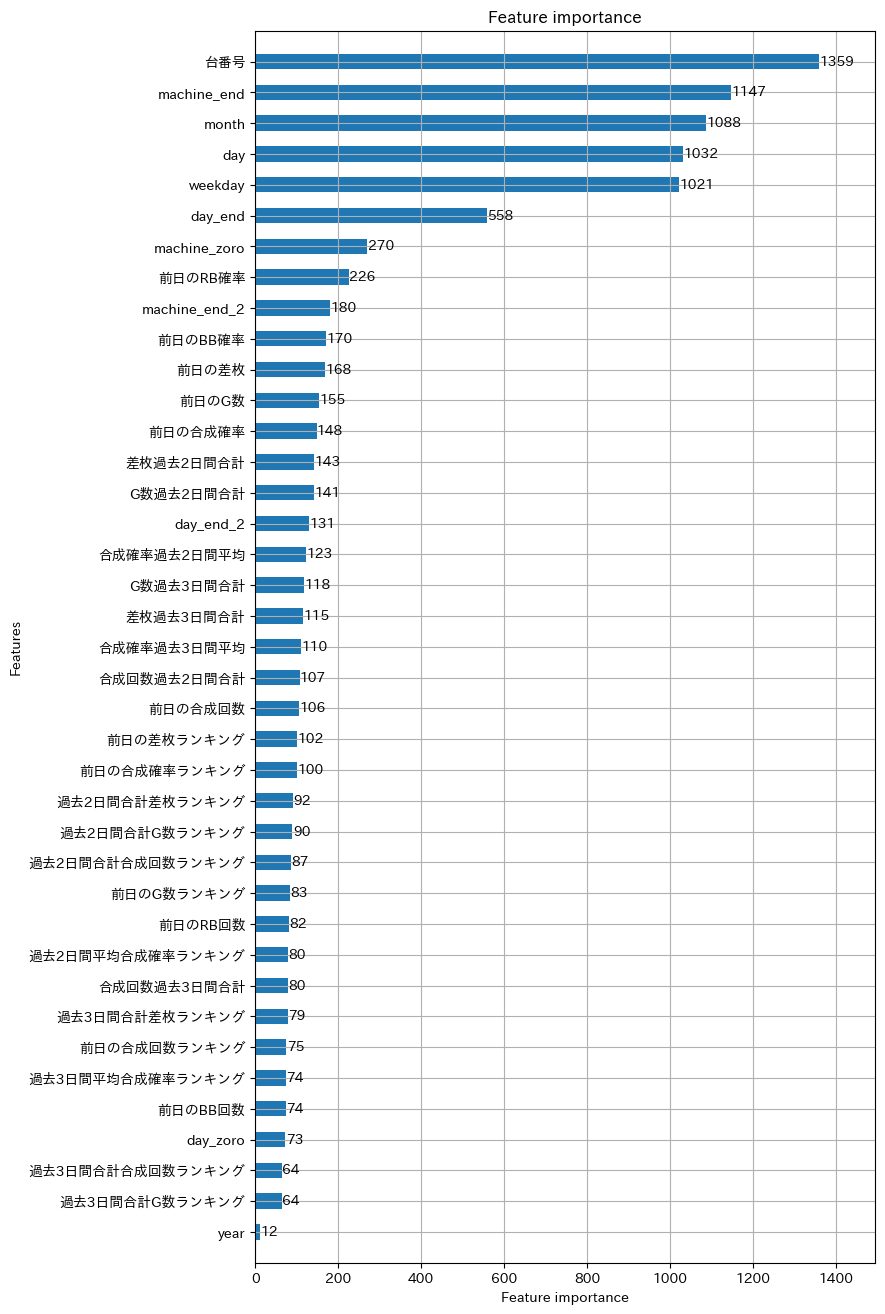

In [260]:
import optuna.integration.lightgbm as lgb
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics
import random

seed=random.randint(1, 100)
try:
    X_train = X_train.drop(['G数','差枚', '合成確率', 'BB確率', 'RB確率', 'BB回数', 'RB回数', '合成回数', 'ブドウ確率'],axis=1)
    X_test = X_test.drop(['G数','差枚', '合成確率', 'BB確率', 'RB確率', 'BB回数', 'RB回数', '合成回数','ブドウ確率'],axis=1)
except:
    pass
print(X_train.columns)
# 文字列と数値の対応を定義した辞書
mapping = {'アイムジャグラーEX-TP': 1, 'マイジャグラーV': 2, 'ファンキージャグラー2': 3, 'ハッピージャグラーVIII': 4}

#lightgbmを行うために各objectをint、floatに変換
for column in X_train.columns:
    if column=="機種名":
        # '機種名' 列をマップして置き換え
        X_train[column] = X_train[column].map(mapping)
        X_test[column] = X_test[column].map(mapping)
    if column in ['台番号', 'G数', '差枚', 'BB', 'RB', 'year', 'month', 'day', 'weekday', 'day_end', 'day_end_2', 'day_zoro',
       'machine_end', 'machine_end_2', 'machine_zoro', '前日の差枚', '前日のG数']:
        X_train[column] = X_train[column].astype(float)
        X_test[column] = X_test[column].astype(float)
    else:
        X_train[column] = X_train[column].astype(float)
        X_test[column] = X_test[column].astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# X_train["差枚"]=X_train["差枚"].astype(int)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgb_params = {
    'boosting_type': 'gbdt',
    'metric':'binary_error', # 評価指標 : 不正解率(1 - 正解率)
    # 'num_iterations':40,
    # 'num_leaves':5,
    # 'min_data_in_leaf':10,
    # 'min_child_samples': 10,  # ノードを分割するための最小サンプル数を増やす
    # 'min_child_weight': 0.001,  # ノードを分割するための最小の重み合計を増やす
    'class_weight':'balanced',
    'random_state':seed,
    'verbose': -1,
    'objective': 'binary',  # 2値分類を指定 
    # 'min_child_samples': 6,  # ノードを分割するための最小サンプル数を調整
    # 'metric': 'binary_logloss',  # ロジスティック損失を評価指標に指定
 }


model = lgb.train(lgb_params,
     train_set=lgb_train, # トレーニングデータの指定
     valid_sets=lgb_eval, # 検証データの指定
 )

# テストデータの予測 ((各クラスの予測確率 を返す))
y_pred_prob = model.predict(X_test)
# テストデータの予測 (予測クラスを返す)
# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# 保存したモデルを使う場合はこんな感じ
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)

# AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)
lgb.plot_importance(model, height=0.5, figsize=(8,16))

In [261]:
# 真値と予測値の表示
y_pred = np.where(y_pred < 0.5, 0, 1)
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# # 真値と予測確率の表示
# df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1]})
# display(df_pred_prob)


target  target_pred
0         0            0
1         0            0
2         0            0
3         0            0
4         0            0
5         0            0
6         0            0
7         1            0
8         0            0
9         0            0
10        0            0
11        0            0
12        0            0
13        0            0
14        1            0
15        0            0
16        1            0
17        1            0
18        0            0
19        1            0
20        0            0
21        1            1
22        0            0
23        1            0
24        1            0
25        1            0
26        1            0
27        0            0
28        1            0
29        0            1
30        0            0
31        0            0
32        0            0
33        0            0
34        0            0
35        0            0
36        1            0
37        0            0
38        0            0
39        0            0
40        0            0
41        0            0
42        0            0
43        0            0
44        0            0
45        0            1
46        0            0
47        1            1
48        0            0
49        0            0
50        0            0
51        1            0
52        0            0
53        0            1
54        0            0
55        0            1
56        0            0
57        0            0
58        0            0
59        0            1
60        0            0
61        0            0
62        1            1
63        0            0
64        0            0
65        0            0
66        0            0
67        0            0
68        0            0
69        0            0
70        0            0
71        0            0
72        0            1
73        0            0
74        1            0
75        1            0
76        1            0
77        0            0
78        0            0
79        0            0
80        0            0
81        1            0
82        0            0
83        0            0
84        0            0
85        0            0
86        0            0
87        0            0
88        0            0
89        0            0
90        0            0
91        0            0
92        1            0
93        0            0
94        0            0
95        0            0
96        1            1
97        0            0
98        0            0
99        0            0
100       0            0
101       0            0
102       0            0
103       0            0
104       0            0
105       0            0
106       1            0
107       0            0
108       0            0
109       0            0
110       1            1
111       0            0
112       0            0
113       1            0
114       0            0
115       0            0
116       0            0
117       0            0
118       0            0
119       1            1
120       0            0
121       0            0
122       1            1
123       0            1
124       1            0
125       0            0
126       0            0
127       0            0
128       0            0
129       0            0
130       0            0
131       0            0
132       0            0
133       1            0
134       0            0
135       0            0
136       1            1
137       0            0
138       0            0
139       0            0
140       0            0
141       0            0
142       1            0
143       0            0
144       1            0
145       0            0
146       0            0
147       1            0
148       0            0
149       0            0

Acc : 0.7933333333333333
[[111   7]
 [ 24   8]]


<AxesSubplot:>

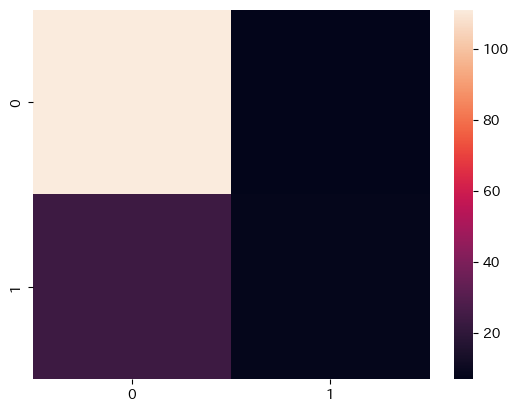

In [262]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# モデル評価
# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)
# 混同行列の作成
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix)

Empty DataFrame
Columns: [日付, 機種名, 台番号, G数, 差枚, BB回数, RB回数, 合成確率, BB確率, RB確率, ブドウ確率, setting, day_end, 合成回数, 機種台数, 前日のG数, 前日の差枚, 前日のBB回数, 前日のRB回数, 前日の合成回数, 前日の合成確率, 前日のBB確率, 前日のRB確率, 前日のG数ランキング, 前日の差枚ランキング, 前日の合成回数ランキング, 前日の合成確率ランキング, 2日前のG数, 2日前の差枚, 2日前のBB回数, 2日前のRB回数, 2日前の合成回数, 2日前の合成確率, 2日前のBB確率, 2日前のRB確率, 3日前のG数, 3日前の差枚, 3日前のBB回数, 3日前のRB回数, 3日前の合成回数, 3日前の合成確率, 3日前のBB確率, 3日前のRB確率, G数過去2日間合計, 差枚過去2日間合計, 合成回数過去2日間合計, 合成確率過去2日間平均, G数過去3日間合計, 差枚過去3日間合計, 合成回数過去3日間合計, 合成確率過去3日間平均, 過去2日間合計G数ランキング, 過去2日間合計差枚ランキング, 過去2日間合計合成回数ランキング, 過去2日間平均合成確率ランキング, 過去3日間合計G数ランキング, 過去3日間合計差枚ランキング, 過去3日間合計合成回数ランキング, 過去3日間平均合成確率ランキング, year, month, day, weekday, day_end_2, day_zoro, machine_end, machine_end_2, machine_zoro, learning_setting]
Index: []

IndexError: At least one sheet must be visible

In [239]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/69/60/87a06ef66b34cbe2f2eb0ab66f003664404a7f40c21403a69fad7e28a82b/optuna-3.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for cmaes>=0.10.0 from https://files.pythonhosted.org/packages/f7/46/7d9544d453346f6c0c405916c95fdb653491ea2e9976cabb810ba2fe8cd4/cmaes-0.10.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 8.7 MB/s eta 0:00:00a 0:00:01
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
